# **Unlocking Revenue Opportunities from Low Performing Airbnb Listings in Bangkok**

*What Prevents many Airbnb Listings from Capturing Market Demand?*

# **Introduction & Business Context**

### **a.) Background**

Bangkok is one of the world’s most popular travel destinations and ranked 5th on Airbnb’s Top Trending Global Travel Destinations 2023, according to The Thaiger. 
This strong demand has driven rapid growth in the number of Airbnb listings across the city.

However, despite strong market demand, not all listings are able to convert this demand into actual bookings. A significant number of listings remain underutilized, reflected in low occupancy rates and limited review activity. This imbalance suggests that the challenge lies not in the absence of demand, but in how effectively listings are positioned and managed to capture it.


As tourism demand continues to grow, the need for alternative accommodations beyond hotels has increased. Airbnb plays a significant role in meeting this demand by **offering affordable, flexible, and diverse accommodation options**. 

Popular Airbnb areas in Bangkok include 
- Sukhumvit 
- Khlong Toei, and 
- Bang Rak

which are known for their accessibility and proximity to major attractions.

From a business perspective, underperforming listings represent missed revenue opportunities for hosts and reduced marketplace efficiency for Airbnb. Understanding why some listings fail to attract guests is therefore critical to improving host performance, optimizing supply quality, and enhancing the overall guest experience in Bangkok.



reference : https://thethaiger.com/hot-news/tourism/bangkok-comes-in-at-5th-place-on-airbnbs-top-trending-global-travel-spots-in-2023

### **b.) Airbnb Revenue Model**

Airbnb generates revenue through service fees charged to platform users. According to Airbnb’s official support documentation:

- Hosts are charged approximately 3% per booking, while

- Guests are charged around 6–12%, depending on location and length of stay.

### **c.) Airbnb User Segments**

Typical Airbnb users include:

- Young travelers aged approximately 20–40

- Digital nomads and remote workers

- Backpackers

- Small families seeking larger living spaces

- Solo travelers or couples interested in local experiences

### **d.) Business Problem & Objectives**

#### **Main Business Question**

**What factors characterize low-performing Airbnb listings in Bangkok, and how can data driven insights be used to improve their occupancy and revenue potential?**

With the growing number of Airbnb listings in Bangkok, Airbnb faces a key challenge: 
how to identify underperforming listings and understand the factors that prevent them from capturing existing market demand. 

Addressing this challenge is essential for:

- Supporting the `Host Growth Team` in reactivating low-performing listings

- Enabling the `Local Market Operations Team` to improve overall supply quality

- Assisting the `Supply Strategy Team` in prioritizing interventions for listings with unrealized revenue potential



#### **Objectives of the Analysis**

To address this challenge, this analysis focuses on the following key problem areas:

1. **Identification of Low-Performing Listings**

    What are the key characteristics of Airbnb listings with low engagement?

2. **Drivers of Low Listing Performance**

    Which factors such as pricing, room type, location, availability, and minimum stay are associated with low listing performance?

3. **Pricing and Room Type Impact**

    How do pricing patterns differ between high performing and low performing listings across room types?

4. **Geographical Distribution of Underperforming Listings**

    Which areas show the highest concentration of low-performing listings?

5. **Host Characteristics and Listing Performance**

    Do hosts with multiple listings consistently achieve better performance?

Overall, this analysis aims to identify the key drivers of low listing performance such as : **pricing strategy, availability, room type, location, and review** to help stakeholders develop data driven optimization strategies and unlock revenue opportunities from underperforming Airbnb listings in Bangkok.

### **Limitations:**

- No sentiment analysis of reviews (focus is on quantity, not quality)

- No demand forecasting or predictive modeling

- Limited to available data fields (no booking data, cancellation rates, etc.)

- Cannot distinguish between truly inactive listings and those recently listed

# Data

This dataset contains information on Airbnb listings in Bangkok, covering property details, host characteristics, geographic location, pricing, and listing performance indicators. Each row represents a single Airbnb listing with the following key attributes:

1. `id` : A unique identifier assigned by Airbnb to each listing.

2. `name` : The name or title of the property as displayed on Airbnb.

3. `host_id` : A unique Airbnb identifier for the host.

4. `host_name` : The name of the host managing the listing.

5. `neighbourhood` : The neighborhood or area where the property is located.

6. `latitude`: The latitude coordinate of the property based on the WGS84 geodetic system.

7. `longitude` : The longitude coordinate of the property based on the WGS84 geodetic system.

8. `room_type`: The type of accommodation offered (e.g., entire home/apartment, private room, shared room, or hotel room).

9. `price`: The daily rental price of the property in local currency (Thai Baht).

10. `minimum_nights`: The minimum number of nights required per booking.

11. `number_of_reviews` : The total number of reviews received by the listing.

12. `last_review` : The date of the most recent review.

13. `calculated_host_listings_count` : The number of listings owned by the host within the same city or region at the time of data collection.

14. `availability_365` : The number of days in a year that the property is available for booking.

15. `number_of_reviews_ltm` : The number of reviews received by the listing in the last 12 months.

**!! Important notes !! :**

- This dataset contains listing-level information, not actual transaction data. Therefore, it does not include details on completed bookings, revenue, or actual length of stay.

- As a result, the analysis focuses on properties that are listed on the platform, rather than properties that were definitively booked by guests.

**Importing Libraries and Dataset**

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
import seaborn as sns
import matplotlib.pylab as plt
import re

import missingno as msno
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)


## **Data Understanding & Quality Check**

In [2]:
df = pd.read_csv('Airbnb Listings Bangkok.csv')
df.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


In [3]:
display(df.describe(), df.describe(include='object'))

,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,15854.000000,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,10064.000000,15854.000000,15854.000000,15854.000000
mean,7926.500000,1.579397e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,0.813145,13.889618,244.378643,3.481519
std,4576.799919,2.946015e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,1.090196,30.269848,125.843224,8.916937
min,0.000000,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,3963.250000,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.120000,1.000000,138.000000,0.000000
50%,7926.500000,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,0.435000,4.000000,309.000000,0.000000
75%,11889.750000,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,1.060000,13.000000,360.000000,3.000000
max,15853.000000,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


,name,host_name,neighbourhood,room_type,last_review
count,15846,15853,15854,15854,10064
unique,14794,5312,50,4,1669
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt,2022-12-11
freq,45,228,2153,8912,189


In [4]:
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Unnamed: 0,15854,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]"
1,id,15854,"[27934, 27979, 28745, 35780, 941865, 1704776, 48736, 1738669, 1744248, 952677, 55681, 1765918, 55686, 59221, 959254, 62217, 1791481, 66046, 105042, 1793000, 960858, 113744, 965722, 1808600, 118118, 1816517, 969792, 121410, 145343, 973830, 156583, 1823321, 159854, 976690, 978531, 166267, 169285, 978969, 1842066, 169514, 1849029, 1862089, 985743, 988373, 172332, 1016487, 1862331, 1862377, 185364, 1887544, 1888303, 1019241, 241416, 1026451, 1028469, 1028486, 1035589, 1035640, 1897982, 296960, 1898332, 1041976, 313459, 1052180, 1926489, 320014, 1933894, 1057173, 1060320, 384924, 1067748, 1077493, 1943048, 385130, 385278, 385979, 390611, 1947314, 1079039, 1086843, 393066, 397449, 405662, 1088343, 1094136, 1961981, 407381, 1975849, 1133843, 413824, 428360, 428421, 428907, 428950, 430691, 430703, 430706, 432004, 439051, 1138679, ...]"
2,name,14794,"[Nice room with superb city view, Easy going landlord,easy place, modern-style apartment in Bangkok, Spacious one bedroom at The Kris Condo Bldg. 3, Suite Room 3 at MetroPoint, NEw Pro!! Bungalow Bkk Centre, Condo with Chaopraya River View, 1 chic bedroom apartment in BKK, Batcave, Pool view, near Chatuchak, Standard Room Decor do Hostel, Sathorn Terrace Apartment(61), 2BR apt in a cozy neighborhood, Comfy bedroom near River pier & BTS Taksin., budget hotel bangkok near subway, Deluxe Condo, Nana, Pool/GYM/Sauna, Luxury@swimpool/FreeWiFi/nearJJMkt, Nice and Quiet condo near BTS Onnut, 24Flr- 1br Apt near JJ, MRT, BTS, Central Bangkok 3 Bedroom Apartment, The Duplex - Asoke- Luxury 92sqm, New, Stylish & Luxury Studio Condo, River View - Ivy Condo (1 Bedroom), Siamese Gioia on Sukhumvit 31, Contemporary Modern Duplex-Thong Lo, Pan Dao Condo 5 min from BTS On Nut, 1 BR condominium center BKK +NETFLIX+55SQM, 1 penthouse in central Bangkok, MetroPoint Suite Room, Near Airport, Boutique Rooms Near Bangkok Airport, BangLuang House1 @ Bangkok Thailand, Studio near Chula University/Silom walk to MRT/BTS, กรองทองแมนชั่น (ลาดพร้าว 81), Deluxe one Bedroom Condo w.Pool-GYM & Sauna 8-7, Beautiful 1 BR apartment @BTS Ari, Urban Oasis in the heart of Bangkok, 1Bed apt. near Chula University/Silom, Stay at the ROARING RATCHADA!, 60 m2 apartment in Thong Lor, Bangkok, ICONSIAM River view on 49th floor, 2br apt in Sukhumvit Asoke near BTS, Self catering cozy1-bed near BTS, ❂☀☀☀Perfect Escape☀☀☀Sunny Roof EnSuite☀☀☀☀, Room with city view of BKK, BangLuang House 2@ Bangkok Thailand, Tranquility found in busy Bangkok near new skytran, Private room in Bangkok, ☞✪✪✪✪Roomy Studio 4 Family r friends✪No Stairs✪✪✪✪, ☞Downtown Central Studio-Bangkok MRT, Beautiful Wood Bangkok Resort House, ""Serviced 2 Bed Scenic SkyVillas"", Cozy 1BR rooftop (BTS Ploenchit) heart of bangkok, Chic two bedroom for Monthly rental, Sukhumvit52 near SkyTrain to BkkCBD, ♡Chic Studio, Easy Walk to Pier & BTS Taksin♡, One Bedroom Suite- WIFI- SATHORN, STUDIO RM2 - WIFI- SATHORN, Quiet Double Bed Apartment, Quiet Double Bed Apartment, Suvarnabhumi free transfer, Luxury&Comfy wthWifi walk-distance to Subwy-Malls, Apr. for rent full fur 1 bedroom, monthly, Long-stay special rate spacious entire floor Siam, One Bed Room at Sukumvit 50 Bangkok, City View, relaxed theme & delicious food around, Ideo Blucove Sukhumvit Bangkok, 2-BR condo near BTS on Sukhumvit Rd, NewlyRenovated! 3Br,SingleHouse, Park/BTS/Airport., IdeoMix, Sukhumvit RD, close to BTS, Mix Dorm Decor do Hostel, Oasis in the heart of Bangkok, 5 mins by car from Chong Nonsi BTS Station, Inn Saladaeng - Superior hotel roo

**Data Structure & Quality Insights**

- The dataset contains **15,854 listings**, with `id` showing full uniqueness, indicating each row represents a distinct Airbnb listing.
- The column `Unnamed: 0` has the same number of unique values as the dataset size, suggesting it is an **index column** and can be safely dropped.
- Several columns contain **missing values**, including `name`, `host_name`, `last_review`, and `reviews_per_month`, which may indicate inactive or newly created listings.
- The `host_id` column has fewer unique values (6,659) compared to listings, indicating that **many hosts manage multiple listings**.
- The `room_type` column consists of only **4 categories**, making it suitable for categorical comparison across performance metrics.
- Price values show **high variability** (3,040 unique values), suggesting a wide range of pricing strategies across listings.
- The `last_review` column is currently stored as an object and should be converted to **datetime format** for time-based analysis.
- The `availability_365` column ranges widely (0–365), which can be used as an indicator of **listing activity or inactivity**.
- Review-related columns (`number_of_reviews`, `number_of_reviews_ltm`, `reviews_per_month`) show skewed distributions, indicating that **a large portion of listings have low engagement**.


In [5]:
# Check the DataFrame info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854 non-null  int64  
 12  last_review                     

Insight:

- The `name`, `host_name`, `last_review`, and `review_per_month` columns contain null values.

- The `host_id` column is stored as an integer, whereas it should be treated as an **object (categorical identifier)**.

- The `last_review` column represents the date of the most recent review but is currently stored as an object instead of a datetime format.

In [6]:
# Column descriptions (grouped logically)
column_groups = {
    "Listing Identification": ["id", "name"],
    "Host Information": ["host_id", "host_name", "calculated_host_listings_count"],
    "Location Details": ["neighbourhood", "latitude", "longitude"],
    "Listing Characteristics": ["room_type", "price", "minimum_nights"],
    "Performance Metrics": [
        "number_of_reviews", 
        "number_of_reviews_ltm", 
        "reviews_per_month", 
        "last_review"
    ],
    "Availability": ["availability_365"]
}

print("COLUMN GROUPINGS FOR ANALYSIS")
for group, columns in column_groups.items():
    print(f"\n{group}:")
    for col in columns:
        print(f"  - {col}")

COLUMN GROUPINGS FOR ANALYSIS

Listing Identification:
  - id
  - name

Host Information:
  - host_id
  - host_name
  - calculated_host_listings_count

Location Details:
  - neighbourhood
  - latitude
  - longitude

Listing Characteristics:
  - room_type
  - price
  - minimum_nights

Performance Metrics:
  - number_of_reviews
  - number_of_reviews_ltm
  - reviews_per_month
  - last_review

Availability:
  - availability_365


In [7]:
df.isnull().sum()

Unnamed: 0                           0
id                                   0
name                                 8
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

In [8]:
df.nunique()

Unnamed: 0                        15854
id                                15854
name                              14794
host_id                            6659
host_name                          5312
neighbourhood                        50
latitude                           9606
longitude                         10224
room_type                             4
price                              3040
minimum_nights                       86
number_of_reviews                   298
last_review                        1669
reviews_per_month                   513
calculated_host_listings_count       50
availability_365                    366
number_of_reviews_ltm                85
dtype: int64

In [9]:
# Check for duplicate listings
duplicate_ids = df['id'].duplicated().sum()
print(f"Duplicate listing IDs: {duplicate_ids}")

# Check for duplicate host listings
duplicate_host_listings = df.duplicated(subset=['host_id', 'name']).sum()
print(f"Potential duplicate listings (same host + name): {duplicate_host_listings}")

Duplicate listing IDs: 0
Potential duplicate listings (same host + name): 909


**Missing Values Info**

In [10]:
# persentase missing value check
df.isna().sum()/df.shape[0]*100

Unnamed: 0                         0.000000
id                                 0.000000
name                               0.050460
host_id                            0.000000
host_name                          0.006308
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       36.520752
reviews_per_month                 36.520752
calculated_host_listings_count     0.000000
availability_365                   0.000000
number_of_reviews_ltm              0.000000
dtype: float64

In [11]:
# Identification missing values based count and propotion persentase 
def missing_values_table(data):
    miss_val_count = data.isnull().sum()
    miss_val_percent = ((miss_val_count / len(data)) * 100).round(2).astype(str)+'%'
    table = pd.concat([miss_val_count, miss_val_percent], axis=1)
    table.columns = ['Missing Values Count', 'Proportion Missing Values']
    table = table[table['Missing Values Count'] != 0].sort_values('Proportion Missing Values', ascending=False).round(2)
    return table

df_missing_values = missing_values_table(df)
display(df_missing_values)

,Missing Values Count,Proportion Missing Values
last_review,5790,36.52%
reviews_per_month,5790,36.52%
name,8,0.05%
host_name,1,0.01%


**Insight :**

Missing values are primarily found in review-related columns such as 
`reviews_per_month`, `number_of_reviews_ltm`, and `last_review`.

In the context of this analysis, these missing values are not treated as data errors,
but rather as indicators of low or inactive listing engagement. 

Therefore, missing review metrics are retained and handled carefully to preserve signals of
underperforming listings.


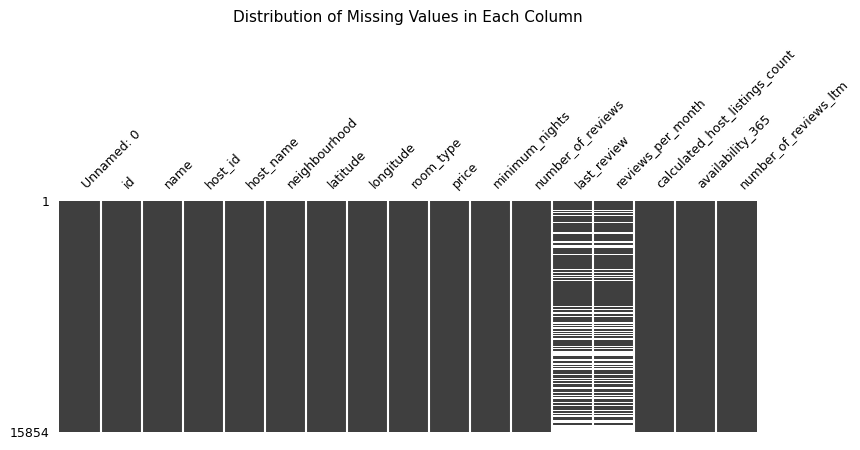

In [12]:
# identifiaction missing values distribution 
msno.matrix(df, sparkline=False, figsize=(9,3), fontsize=11)
plt.title('Distribution of Missing Values in Each Column\n', fontsize=11, loc='center')
plt.yticks(fontsize=9)
plt.xticks(fontsize=9)
plt.show()



Missing values are handled based on their relevance to the business objective:

- Review-related columns (`number_of_reviews`, `number_of_reviews_ltm`,
  `reviews_per_month`) are filled with **0**, as missing values indicate no booking
  or engagement activity.
- The `last_review` column is converted to datetime format, and missing values are
  retained as `NaT` to represent listings with no recent review activity.
- Missing values in non-critical text fields such as `name` and `host_name` are
  retained or labeled as "Unknown", as they do not directly affect listing performance.
- No rows are removed solely due to missing review-related data, as these values are
  essential signals for identifying underperforming listings.


## **Data Cleaning - Prepation**

In [13]:
# Copy the original data to data_clean for cleaning process
df_clean=df.copy()

### **Drop unnecessary index column**

In [14]:
# Drop the first column (Unnamed: 0) if it's just an index
df_clean.drop(columns=['Unnamed: 0'], inplace=True)

In [15]:
print("\nCleaned DataFrame Info:")
print(f"Shape: {df_clean.shape}")


Cleaned DataFrame Info:
Shape: (15854, 16)


In [16]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15854 non-null  int64  
 1   name                            15846 non-null  object 
 2   host_id                         15854 non-null  int64  
 3   host_name                       15853 non-null  object 
 4   neighbourhood                   15854 non-null  object 
 5   latitude                        15854 non-null  float64
 6   longitude                       15854 non-null  float64
 7   room_type                       15854 non-null  object 
 8   price                           15854 non-null  int64  
 9   minimum_nights                  15854 non-null  int64  
 10  number_of_reviews               15854 non-null  int64  
 11  last_review                     10064 non-null  object 
 12  reviews_per_month               

### **Handling missing values**

**Handling Missing Values Based on Analysis Objectives**

**Analysis Objective**

To identify the factors that contribute to Airbnb listing popularity in Bangkok, using the following key performance indicators:

- `number_of_reviews`
- `reviews_per_month`
- `availability_365`
- `last_review`

In [17]:
df_clean_missing_values = missing_values_table(df_clean)
display(df_clean_missing_values)

,Missing Values Count,Proportion Missing Values
last_review,5790,36.52%
reviews_per_month,5790,36.52%
name,8,0.05%
host_name,1,0.01%


#### **Handling Missing Values Strategy**

| Column              | % Missing | Analytical Role           | Handling Approach        | Rationale                                                            |
| ------------------- | --------- | ------------------------- | ------------------------ | -------------------------------------------------------------------- |
| `reviews_per_month` | 36.52%    | Popularity Indicator      | Imputed with 0           | A value of 0 represents listings with no recent activity or reviews. |
| `last_review`       | 36.52%    | Activity Indicator        | Retained as `NaT`        | Useful for identifying inactive or newly created listings.           |
| `name`              | 0.05%     | Not used in analysis      | Dropped                  | Not critical to the analysis and the proportion is negligible.       |
| `host_name`         | 0.001%    | Supplementary information | Imputed with `"Unknown"` | Not used as an analytical feature; missing proportion is minimal.    |
| Other columns       | 0%        | –                         | –                        | No missing values detected.                                          |


In [18]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15854 non-null  int64  
 1   name                            15846 non-null  object 
 2   host_id                         15854 non-null  int64  
 3   host_name                       15853 non-null  object 
 4   neighbourhood                   15854 non-null  object 
 5   latitude                        15854 non-null  float64
 6   longitude                       15854 non-null  float64
 7   room_type                       15854 non-null  object 
 8   price                           15854 non-null  int64  
 9   minimum_nights                  15854 non-null  int64  
 10  number_of_reviews               15854 non-null  int64  
 11  last_review                     10064 non-null  object 
 12  reviews_per_month               

In [19]:
# Drop misisng values name
df_clean = df_clean[~df_clean['name'].isna()]

- **Handle missing values in review related columns**

In [20]:
# Check whether missing values in 'last_review' and 'reviews_per_month'
# occur only when 'number_of_reviews' equals zero

# Subset rows with missing values
missing_reviews_per_month = df_clean[df_clean['reviews_per_month'].isna()]
missing_last_review = df_clean[df_clean['last_review'].isna()]

# Validate whether missing values only appear when there are no reviews
is_reviews_pm_missing_only_when_no_reviews = (
    missing_reviews_per_month['number_of_reviews'] == 0
).all()

is_last_review_missing_only_when_no_reviews = (
    missing_last_review['number_of_reviews'] == 0
).all()

# Print validation results
print("Does 'reviews_per_month' only have missing values when 'number_of_reviews' = 0 ?")
print(is_reviews_pm_missing_only_when_no_reviews)

print("\nDoes 'last_review' only have missing values when 'number_of_reviews' = 0 ?")
print(is_last_review_missing_only_when_no_reviews)


Does 'reviews_per_month' only have missing values when 'number_of_reviews' = 0 ?
True

Does 'last_review' only have missing values when 'number_of_reviews' = 0 ?
True


In [21]:
# For review related columns, 0 values are meaningful (no reviews)
review_cols = [
    'number_of_reviews',
    'number_of_reviews_ltm',
    'reviews_per_month'
]

df_clean[review_cols] = df_clean[review_cols].fillna(0)

In [22]:
# For last_review, NaN means no reviews
print(f"\nlast_review: {df_clean['last_review'].isnull().sum()} missing values (no reviews)")


last_review: 5784 missing values (no reviews)


**-->> Missing values are treated as zero to represent no engagement or bookings**

##### **Validation Insight**

The validation confirms that missing values in `reviews_per_month` and `last_review`
occur only when `number_of_reviews` equals zero. 

This supports the assumption that
these **missing values represent listings with no booking activity** rather than data
quality issues.

Therefore, treating missing review-related values as zero is both logically and
business-wise justified in the context of identifying low-performing listings.


- **Handle missing values in `host_name`**

In [23]:
# Missing values are filled with a neutral label to avoid misleading imputation
df_clean['host_name'] = df_clean['host_name'].fillna('Unknown')

In [24]:
df_clean['host_name'].isna().sum()

np.int64(0)

In [25]:
df_clean.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,0.00,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,0.00,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,0.00,3,365,0


In [26]:
df_clean.isna().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5784
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

Although `reviews_per_month` contains no missing values after imputation, missing values
in `last_review`  column, reflecting listings with no recorded review activity

These two variables capture different temporal aspects of listing performance
and are used together to strengthen the identification of underperforming listings.


Missing values are now limited to the `last_review` column, reflecting listings with
no recorded review activity. These values are treated as valid indicators of inactive
or low-performing listings rather than data errors.

In [27]:
df_clean.head(10)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,0.00,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,0.00,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,0.00,3,365,0
5,1704776,NEw Pro!! Bungalow Bkk Centre,2129668,Wimonpak,Bang Kho laen,13.69757,100.52880,Entire home/apt,1000,250,19,2017-08-03,0.17,41,365,0
6,48736,Condo with Chaopraya River View,222005,Athitaya,Rat Burana,13.68556,100.49535,Private room,1558,3,1,2014-02-03,0.01,1,365,0
7,1738669,1 chic bedroom apartment in BKK,7045870,Jiraporn,Chatu Chak,13.82925,100.56737,Entire home/apt,1461,1,0,NaN,0.00,1,365,0
8,1744248,"Batcave, Pool view, near Chatuchak",9181769,Nol,Chatu Chak,13.81693,100.56433,Entire home/apt,1558,3,10,2016-03-29,0.09,1,365,0
9,952677,Standard Room Decor do Hostel,5171292,Somsak,Khlong San,13.72040,100.50757,Private room,700,2,4,2019-12-27,0.03,10,87,0


##### **Missing Value Handling Summary**

Missing values have been successfully addressed:

- All columns are free from missing values except last_review, with 5,784 records remaining null.

- This outcome is intentional and aligned with the strategy, as `last_review` is preserved as `NaT` to indicate listings that have never received a review.

- Imputation was applied as planned:

- The reviews_per_month column has been successfully filled with **0 for 5,784 listings**, reflecting listings with no recent engagement.

- The host_name column contains one imputed value labeled as `"Unknown"`, which follows the defined strategy and does not affect analytical outcomes.

### **Duplicate Check by Columns**

In [28]:
df_clean.duplicated().sum()

np.int64(0)

#### **Check columns `id` & `host_id`**

In [29]:
duplication_summary = {
    'Dupllicate data of id column': df_clean['id'].duplicated().sum(),
    'Duplicate data of host_id column': df_clean['host_id'].duplicated().sum()
}

print("Check Duplicate in Unique Columns ")
for key, value in duplication_summary.items():
    print(f"- {key}: {value}")


Check Duplicate in Unique Columns 
- Dupllicate data of id column: 0
- Duplicate data of host_id column: 9194


#### **Validation Insight**

- The `id column` is expected to be unique, as each value represents a distinct Airbnb listing. Any duplication in this column would indicate a data integrity issue.

- The `host_id` column may contain repeated values, which is expected since a single host can manage multiple listings.

### **Data Anomaly Check**

Several logical and structural validations were performed to ensure data quality:

- Listing `prices` were checked to confirm that no values were zero or negative, as such values are not economically meaningful.
- The `minimum_nights` column was reviewed to identify unrealistically high values that may indicate extreme booking constraints.
- The `availability_365` column was validated to ensure values do not exceed the maximum number of days in a year.

These checks help ensure that the dataset does not contain logically invalid values that could distort the analysis results.

In [30]:
# Check listings with price = 0
print("Number of listings with price = 0:", (df_clean['price'] == 0).sum())

# Drop listings with price = 0
df_clean = df_clean[df_clean['price'] > 0]

# Check dataset shape after dropping
print("Dataset shape after dropping price = 0:", df_clean.shape)

Number of listings with price = 0: 1
Dataset shape after dropping price = 0: (15845, 16)


#### **Interpretation :**

**(price = 0)**

- Cross check confirms that no listings with a price value of 0 remain in the dataset.

- The total number of records decreased from 15854 to 15853, indicating that one invalid listing was successfully removed.

- The dataset structure remains intact, consisting of 17 columns as expected.

- The handling of price anomalies was completed without disrupting the overall data structure, ensuring the dataset is suitable for further analysis.

#### **Extract Data**

In [31]:
df_clean['last_review'].dtype


dtype('O')

In [32]:
df_clean['last_review'] = pd.to_datetime(df_clean['last_review'])

In [33]:
# Extract year from last_review
df_clean['review_year'] = df_clean['last_review'].dt.year

In [34]:
print("Tahun review paling lama :", df_clean['review_year'].min())
print("Tahun review paling baru :", df_clean['review_year'].max())

Tahun review paling lama : 2012.0
Tahun review paling baru : 2022.0


In [35]:
# Checking future_year
future_year = df_clean[df_clean['review_year'] > 2022]

# Check for reviews dated before Airbnb was founded (2008)
too_old_year = df_clean[df_clean['review_year'] < 2008]

# Display number of anomalous records
print("Review in the futere:", future_year.shape[0])
print("Review Old :", too_old_year.shape[0])


Review in the futere: 0
Review Old : 0


#### **Interpretation: Year Anomaly Check**

A validation was conducted to identify reviews dated before Airbnb was founded in 2008.

The results show that no listings contain review dates earlier than 2008, indicating
that the `last_review` data is temporally consistent and does not contain historical
anomalies.

### **Data Type Adjustment for Categorical Variables**

In [36]:
# Convert selected categorical columns to 'category' data type
# This improves memory efficiency and supports grouping and comparison analysis

categorical_cols = ['neighbourhood', 'room_type']

for col in categorical_cols:
    if col in df_clean.columns:
        # These columns represent categorical attributes used in analysis
        df_clean[col] = df_clean[col].astype('category')

# Display a summary of data types after adjustment
print("Data types adjusted:")
print(df_clean.dtypes.value_counts())

Data types adjusted:
int64             8
float64           4
object            2
category          1
category          1
datetime64[ns]    1
Name: count, dtype: int64


In [37]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15845 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              15845 non-null  int64         
 1   name                            15845 non-null  object        
 2   host_id                         15845 non-null  int64         
 3   host_name                       15845 non-null  object        
 4   neighbourhood                   15845 non-null  category      
 5   latitude                        15845 non-null  float64       
 6   longitude                       15845 non-null  float64       
 7   room_type                       15845 non-null  category      
 8   price                           15845 non-null  int64         
 9   minimum_nights                  15845 non-null  int64         
 10  number_of_reviews               15845 non-null  int64         
 11  last_re

### **Find Unique Columns (Categorical Variable)**

In [38]:
df_clean['neighbourhood'].unique()

['Ratchathewi', 'Bang Na', 'Bang Kapi', 'Din Daeng', 'Bang Kho laen', ..., 'Thung khru', 'Bang Khae', 'Bang Khun thain', 'Taling Chan', 'Bang Bon']
Length: 50
Categories (50, object): ['Bang Bon', 'Bang Kapi', 'Bang Khae', 'Bang Khen', ..., 'Thung khru', 'Vadhana', 'Wang Thong Lang', 'Yan na wa']

In [39]:
print("Count Distinct of categorical_cols column:")
print(df_clean[['room_type', 'neighbourhood']].nunique())

Count Distinct of categorical_cols column:
room_type         4
neighbourhood    50
dtype: int64


In [40]:
print("\nUniqe from Categorical Columns:")
for col in df_clean.select_dtypes(include='object').columns:
    print(f"\nKolom: {col}")
    print(df_clean[col].unique())


Uniqe from Categorical Columns:

Kolom: name
['Nice room with superb city view' 'Easy going landlord,easy place'
 'modern-style apartment in Bangkok' ... 'Sukhumvit Condo Next to BTS'
 '1 Bed for 1 person Close to Chatuchak market BTS'
 '素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街']

Kolom: host_name
['Nuttee' 'Emy' 'Familyroom' ... 'Ana Elena' 'Saruta' 'Renee']


#### **Interpretation**

Purpose : 

To identify potential inconsistencies in categorical values, such as typos, mixed languages, extra spaces, or inconsistent labeling.
This includes examining the number of unique values in categorical columns such as neighbourhood, room_type, and similar fields.

1. `room_type` Column

    The column contains 4 unique values:

    - `Entire home/apt`

    - `Private room`

    - `Hotel room`

    - `Shared room`

    All values appear valid and consistent, with no typos or irrelevant variations detected.

2. `neighbourhood` Column

    The column contains **50 unique values**.

    While most values are consistent, several inconsistencies were identified, mainly related to capitalization and spacing, such as:

    - `Thon buri` vs `Thon Buri`

    - `Yan na wa` vs `Yan Nawa`

    - `Bang Khun thain` vs `Bang Khun Thian`

    These inconsistencies may affect location-based segmentation and analysis if left unaddressed.

3. `host_name` and `name` Columns

    These columns contain highly diverse free-text values and are not used as primary analytical features.

    No significant anomalies were identified, and standardization is not required.

### **Neighborhood Name Standardization**
Purpose :

- To standardize district names so that the same locations are not treated as separate categories.

- To prevent inconsistencies caused by typos, extra spaces, or inconsistent capitalization.


In [41]:
# Standardize text format (trim extra spaces and apply title case)
df_clean['neighbourhood'] = (
    df_clean['neighbourhood']
    .str.strip()          # Remove leading and trailing spaces
    .str.title()          # Standardize capitalization
)

# Manual mapping to correct known typos and inconsistent spellings
neighbourhood_mapping = {
    'Thon Buri': 'Thonburi',
    'Yan Na Wa': 'Yan Nawa',
    'Pom Prap Sattru Phai': 'Pom Prap Sattruphai',
    'Bang Kho Laen': 'Bang Kho Laem',
    'Bang Khun Thain': 'Bang Khun Thian',
    'Parthum Wan': 'Pathum Wan',
    'Pra Wet': 'Prawet'
}

df_clean['neighbourhood'] = df_clean['neighbourhood'].replace(neighbourhood_mapping)

# Check the number of unique neighbourhood values after normalization
print("Number of unique neighbourhoods after normalization:")
print(df_clean['neighbourhood'].nunique())

# Display unique neighbourhood values for verification
print("\nList of neighbourhood values after normalization:")
print(sorted(df_clean['neighbourhood'].unique()))


Number of unique neighbourhoods after normalization:
50

List of neighbourhood values after normalization:
['Bang Bon', 'Bang Kapi', 'Bang Khae', 'Bang Khen', 'Bang Kho Laem', 'Bang Khun Thian', 'Bang Na', 'Bang Phlat', 'Bang Rak', 'Bang Sue', 'Bangkok Noi', 'Bangkok Yai', 'Bueng Kum', 'Chatu Chak', 'Chom Thong', 'Din Daeng', 'Don Mueang', 'Dusit', 'Huai Khwang', 'Khan Na Yao', 'Khlong Sam Wa', 'Khlong San', 'Khlong Toei', 'Lak Si', 'Lat Krabang', 'Lat Phrao', 'Min Buri', 'Nong Chok', 'Nong Khaem', 'Pathum Wan', 'Phasi Charoen', 'Phaya Thai', 'Phra Khanong', 'Phra Nakhon', 'Pom Prap Sattruphai', 'Prawet', 'Rat Burana', 'Ratchathewi', 'Sai Mai', 'Samphanthawong', 'Saphan Sung', 'Sathon', 'Suanluang', 'Taling Chan', 'Thawi Watthana', 'Thonburi', 'Thung Khru', 'Vadhana', 'Wang Thong Lang', 'Yan Nawa']


#### **Interpretation: Categorical Standardization Results**

Unique Value Count After Normalization

    Before normalization: 50

    After normalization: 50

Although the total number of unique categories remains **unchanged**, the normalization process improves data consistency and reliability for future analysis by:

- Ensuring that location-based aggregations (e.g., grouping by district) are not affected by minor differences in spelling, spacing, or capitalization.

- Reducing the risk of errors during filtering, segmentation, and visualization, as district names are now consistently formatted.

**Evaluation of Manual Mapping Results**

Based on the sorted list of unique neighborhood values:

- Corrected names such as Pom Prap Sattruphai, Prawet, Bang Kho Laem, Bang Khun Thian, Pathum Wan, and Yan Nawa appear in the dataset, confirming that the manual typo corrections were successfully applied.

- Previously inconsistent variants (e.g., Thon Buri, Yan Na Wa, Parthum Wan) no longer appear, indicating that they have been properly standardized.

- All district names now follow a consistent title case format, improving readability and uniformity.

- Manual typo corrections, including names such as Pra Wet and Thon Buri, were effectively consolidated into their standardized forms.

### **Feature Creation**

#### **New Column :** `last_review_year`

In [42]:
# Calculate days since last review
df_clean['last_review'] = pd.to_datetime(df_clean['last_review'])
current_date = pd.Timestamp('2023-12-31')  # analysis reference date

df_clean['days_since_last_review'] = (
    current_date - df_clean['last_review']
).dt.days


In [43]:
df_clean['has_review_history'] = df_clean['last_review'].notna()

df_clean['days_since_last_review'] = (
    current_date - df_clean['last_review']
).dt.days

In [44]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15845 entries, 0 to 15853
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              15845 non-null  int64         
 1   name                            15845 non-null  object        
 2   host_id                         15845 non-null  int64         
 3   host_name                       15845 non-null  object        
 4   neighbourhood                   15845 non-null  object        
 5   latitude                        15845 non-null  float64       
 6   longitude                       15845 non-null  float64       
 7   room_type                       15845 non-null  category      
 8   price                           15845 non-null  int64         
 9   minimum_nights                  15845 non-null  int64         
 10  number_of_reviews               15845 non-null  int64         
 11  last_re

In [45]:
df_clean[['last_review', 'days_since_last_review']].head()

,last_review,days_since_last_review
0,2020-01-06,1455.0
1,NaT,NaN
2,NaT,NaN
3,2022-04-01,639.0
4,NaT,NaN


Additional features such as `has_review_history` and `days_since_last_review`
are derived to better capture listing activity patterns. 

These features help
distinguish between listings that have never been booked and listings that were
previously active but are currently inactive.


#### **New Column :** `area`

In [46]:
def label_area(neighbourhood):
    inner = [
        'Bang Phlat','Chatuchak','Bang Sue','Dusit','Bang Rak',
        'Bangkok Noi','Bangkok Yai','Khlong Toei','Ratchathewi',
        'Pathum Wan','Pom Prap Sattruphai','Phra Nakhon',
        'Phaya Thai','Huai Khwang','Din Daeng','Sathon',
        'Khlong San','Thonburi','Bang Kho Laem',
        'Yan Nawa','Samphanthawong','Vadhana','Chatu Chak'
    ]
    
    urban_fringe = [
        'Taling Chan','Thawi Watthana','Nong Khaem','Lak Si',
        'Don Mueang','Sai Mai','Bang Kapi','Lat Phrao',
        'Bang Khen','Bueng Kum','Chom Thong','Bang Na',
        'Prawet','Suanluang','Saphan Sung','Khan Na Yao',
        'Wang Thong Lang','Thung Khru','Bang Khae',
        'Phra Khanong','Rat Burana','Phasi Charoen'
    ]
    
    suburban = [
        'Nong Chok','Lat Krabang','Min Buri',
        'Khlong Sam Wa','Bang Khun Thian','Bang Bon'
    ]
    
    if neighbourhood in inner:
        return 'Inner'
    elif neighbourhood in urban_fringe:
        return 'Urban Fringe'
    elif neighbourhood in suburban:
        return 'Suburban'
    else:
        return 'Unknown'

df_clean['area'] = df_clean['neighbourhood'].apply(label_area)

In [47]:
df_clean['area'].value_counts()

area
Inner           12522
Urban Fringe     3040
Suburban          283
Name: count, dtype: int64

In [48]:
df_clean[df_clean['area'] == 'Unknown']['neighbourhood'].value_counts()

Series([], Name: count, dtype: int64)

In [49]:
df_clean['area'].value_counts()

area
Inner           12522
Urban Fringe     3040
Suburban          283
Name: count, dtype: int64

In [50]:
df_main = df_clean[df_clean['area'] != 'Unknown']

In [51]:
df_clean.groupby('area')['price'].median()

area
Inner           1500.0
Suburban        1000.0
Urban Fringe     996.0
Name: price, dtype: float64

The distribution of listings across areas shows that the majority of Airbnb
listings are concentrated in the `Inner` and `Urban Fringe` areas, while fewer
listings are located in `Suburban` areas. 

This grouping enables higher-level
location analysis and supports comparison of listing performance across
different urban zones.


#### **Occupancy Rate**

In [52]:
# new column for occupancy rate analysis
# to see how well the listings are booked throughout the year

df_clean['reserved_days'] = 365 - df_clean['availability_365']
df_clean['occupancy_rate'] = (df_clean['reserved_days'] / 365) * 100
df_clean['occupancy_rate'] = df_clean['occupancy_rate'].round(2)

- `availability_365` indicates the number of days a listing is available within a year.

- Unavailable days are assumed to **represent guest bookings** rather than **host blocks**.

- **Occupancy Rate** is estimated as the percentage of **booked days out of 365**.

- This metric is a **proxy** due to limited booking data.

Source : https://www.airdna.co/blog/airbnb-hosting-tips-for-occupancy-in-2023 

### **Review DATA CLEANING**


In [53]:
print('Rows before cleaning:', df.shape[0])
print('Rows after cleaning:', df_clean.shape[0])
print('No rows were removed during cleaning.')
print(f'Number of columns increased from {df.shape[1]} to {df_clean.shape[1]} due to feature engineering.')

Rows before cleaning: 15854
Rows after cleaning: 15845
No rows were removed during cleaning.
Number of columns increased from 17 to 22 due to feature engineering.


- No rows were removed during the data cleaning process. 

- Additional columns were added
as part of feature engineering to support further analysis.

- The data cleaning process was conducted selectively to preserve all listings,
particularly those with low performance, which are central to this analysis.

- Missing values and data types were handled contextually to retain meaningful signals
rather than remove them. 

As a result, the dataset is clean, consistent, and ready
for exploratory analysis aligned with the study’s business objectives.

### **Outlier Detection and Treatment Rationale**

**Numerical Summary**

A numerical summary is generated to understand the overall distribution and range
of key variables before conducting deeper exploratory analysis.

In [54]:
print("Dataset Overview for Outlier Analysis:")
print(f"Total Listings: {len(df_clean):,}")
print(f"Date Range: {df_clean['last_review'].min()} to {df_clean['last_review'].max()}")
print("\n" + "="*80)

Dataset Overview for Outlier Analysis:
Total Listings: 15,845
Date Range: 2012-12-15 00:00:00 to 2022-12-28 00:00:00



In [55]:
df_clean.describe().T

,count,mean,min,25%,50%,75%,max,std
id,15845.0,158029389838476800.0,27934.0,21045130.0,35048765.0,52587795.0,790816217344482048.0,294661145674894656.0
host_id,15845.0,154150381.124329,58920.0,39744308.0,122455569.0,239099126.0,492665929.0,131874333.351986
latitude,15845.0,13.74515,13.5273,13.72009,13.73849,13.7595,13.95354,0.043044
longitude,15845.0,100.559899,100.32955,100.52969,100.5614,100.58515,100.92344,0.050918
price,15845.0,3218.667971,278.0,900.0,1429.0,2429.0,1100000.0,24979.160037
minimum_nights,15845.0,15.300032,1.0,1.0,1.0,7.0,1125.0,50.82842
number_of_reviews,15845.0,16.663111,0.0,0.0,2.0,13.0,1224.0,40.6231
last_review,10062,2021-08-30 15:36:57.531305728,2012-12-15 00:00:00,2020-02-20 00:00:00,2022-10-24 00:00:00,2022-12-08 00:00:00,2022-12-28 00:00:00,NaN
reviews_per_month,15845.0,0.516465,0.0,0.0,0.09,0.67,19.13,0.952947
calculated_host_listings_count,15845.0,13.896813,1.0,1.0,4.0,13.0,228.0,30.276935


#### **Outlier Detection Results: IQR Method Results**


OUTLIER DETECTION RESULTS (IQR METHOD)


,Q1,Q3,IQR,lower_bound,upper_bound,outlier_count,outlier_percentage,min_value,max_value
column,,,,,,,,,
price,900.0,2429.0,1529.0,-1393.5,4722.5,1402,8.848217,278,1100000
minimum_nights,1.0,7.0,6.0,-8.0,16.0,3168,19.993689,1,1125
number_of_reviews,0.0,13.0,13.0,-19.5,32.5,2240,14.136952,0,1224
availability_365,138.0,360.0,222.0,-195.0,693.0,0,0.000000,0,365


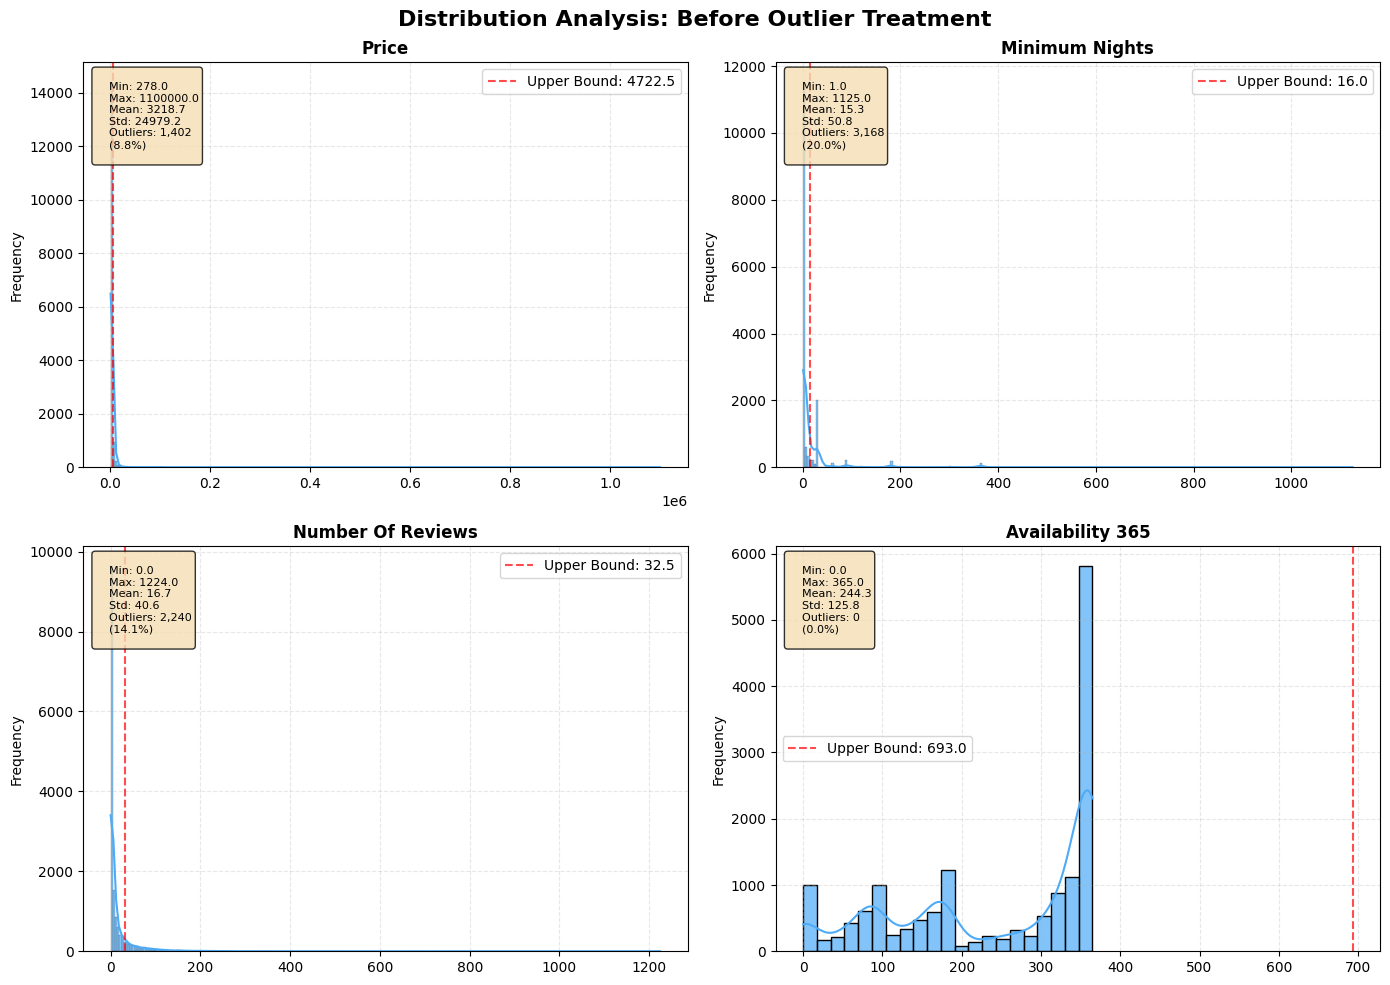

In [56]:
# Function to calculate outlier statistics
def outlier_summary(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outlier_percentage = (len(outliers) / len(df)) * 100
    
    return {
        'column': column,
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'outlier_count': len(outliers),
        'outlier_percentage': outlier_percentage,
        'min_value': df[column].min(),
        'max_value': df[column].max(),
        'data_type': df[column].dtype
    }

# Analyze key numerical columns
columns_to_analyze = ['price', 'minimum_nights', 'number_of_reviews', 'availability_365']
outlier_results = []

for col in columns_to_analyze:
    results = outlier_summary(df_clean, col)
    outlier_results.append(results)

# Create summary DataFrame
outlier_df = pd.DataFrame(outlier_results)
outlier_df = outlier_df.set_index('column')

print("OUTLIER DETECTION RESULTS (IQR METHOD)")
display(outlier_df[['Q1', 'Q3', 'IQR', 'lower_bound', 'upper_bound', 
                    'outlier_count', 'outlier_percentage', 'min_value', 'max_value']])

# Visualize distribution before any cleaning
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Distribution Analysis: Before Outlier Treatment', fontsize=16, fontweight='bold')

for idx, col in enumerate(columns_to_analyze):
    ax = axes[idx//2, idx%2]
    
    # Create histogram with KDE
    sns.histplot(data=df_clean, x=col, ax=ax, kde=True, 
                 color='#4dabf7', edgecolor='black', alpha=0.7)
    
    # Add outlier boundaries
    lower = outlier_df.loc[col, 'lower_bound']
    upper = outlier_df.loc[col, 'upper_bound']
    
    if lower > df_clean[col].min():
        ax.axvline(x=lower, color='red', linestyle='--', alpha=0.7, 
                   label=f'Lower Bound: {lower:.1f}')
    
    ax.axvline(x=upper, color='red', linestyle='--', alpha=0.7, 
               label=f'Upper Bound: {upper:.1f}')
    
    # Add statistics
    stats_text = f"""
    Min: {df_clean[col].min():.1f}
    Max: {df_clean[col].max():.1f}
    Mean: {df_clean[col].mean():.1f}
    Std: {df_clean[col].std():.1f}
    Outliers: {outlier_df.loc[col, 'outlier_count']:,}
    ({outlier_df.loc[col, 'outlier_percentage']:.1f}%)
    """
    
    ax.set_title(f'{col.replace("_", " ").title()}', fontsize=12, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('Frequency')
    ax.grid(True, alpha=0.3, linestyle='--')
    ax.legend()
    
    # Add text box
    ax.text(0.02, 0.98, stats_text, transform=ax.transAxes, fontsize=8,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

#### **Data Cleaning Decision: Why NOT Removing Outliers?**

In [57]:
# Create outlier handling decision table
outlier_decision_table = pd.DataFrame([
    {
        "Variable": "Price",
        "Decision": "Retain",
        "Rationale": "Represents legitimate luxury listings (villas, premium apartments)",
        "Cleaning Action": "Flag as luxury segment for further analysis"
    },
    {
        "Variable": "Minimum Nights",
        "Decision": "Retain",
        "Rationale": "Reflects intentional long-term stay strategy (digital nomads, expats)",
        "Cleaning Action": "Categorize into long-term stay segments"
    },
    {
        "Variable": "Number of Reviews",
        "Decision": "Retain",
        "Rationale": "Indicates highly successful and popular listings",
        "Cleaning Action": "Use as performance benchmark"
    },
    {
        "Variable": "Availability (365 days)",
        "Decision": "Retain",
        "Rationale": "Valid variation in host availability and commitment strategy",
        "Cleaning Action": "Segment by availability level"
    }
])

# Display table
outlier_decision_table


,Variable,Decision,Rationale,Cleaning Action
0,Price,Retain,"Represents legitimate luxury listings (villas, premium apartments)",Flag as luxury segment for further analysis
1,Minimum Nights,Retain,"Reflects intentional long-term stay strategy (digital nomads, expats)",Categorize into long-term stay segments
2,Number of Reviews,Retain,Indicates highly successful and popular listings,Use as performance benchmark
3,Availability (365 days),Retain,Valid variation in host availability and commitment strategy,Segment by availability level


In [58]:
print("\nDATA IMPACT ANALYSIS: BEFORE VS AFTER OUTLIER HANDLING")
print("__"*80)

# Calculate statistics before "treatment" (which is just flagging)
original_stats = pd.DataFrame({
    'Total_Rows': [len(df_clean)],
    'Memory_MB': [df_clean.memory_usage(deep=True).sum() / 1024**2],
    'Data_Integrity': ['100% Complete'],
    'Columns_Modified': ['0'],
    'Rows_Removed': ['0']
}).set_index(pd.Index(['Original Dataset']))

# Create flags for outliers without removing data
df_clean['price_outlier'] = df_clean['price'] > outlier_df.loc['price', 'upper_bound']
df_clean['min_nights_outlier'] = df_clean['minimum_nights'] > outlier_df.loc['minimum_nights', 'upper_bound']
df_clean['reviews_outlier'] = df_clean['number_of_reviews'] > outlier_df.loc['number_of_reviews', 'upper_bound']
df_clean['availability_outlier'] = df_clean['availability_365'] > outlier_df.loc['availability_365', 'upper_bound']

# Count total flagged outliers
total_flagged = (df_clean['price_outlier'] | df_clean['min_nights_outlier'] | 
                 df_clean['reviews_outlier'] | df_clean['availability_outlier']).sum()

after_stats = pd.DataFrame({
    'Total_Rows': [len(df_clean)],
    'Memory_MB': [df_clean.memory_usage(deep=True).sum() / 1024**2],
    'Data_Integrity': ['100% Complete'],
    'Columns_Modified': ['4 (added outlier flags)'],
    'Rows_Removed': ['0']
}).set_index(pd.Index(['After Flagging Outliers']))

# Combine and display
comparison = pd.concat([original_stats, after_stats])
display(comparison)

print("\n" + "OUTLIER DISTRIBUTION BY CATEGORY:")
print("__" * 60)

outlier_distribution = pd.DataFrame({
    'Category': ['Price Outliers', 'Minimum Nights Outliers', 'Review Count Outliers', 'Availability Outliers'],
    'Count': [
        df_clean['price_outlier'].sum(),
        df_clean['min_nights_outlier'].sum(),
        df_clean['reviews_outlier'].sum(),
        df_clean['availability_outlier'].sum()
    ],
    'Percentage': [
        f"{(df_clean['price_outlier'].sum() / len(df_clean)) * 100:.1f}%",
        f"{(df_clean['min_nights_outlier'].sum() / len(df_clean)) * 100:.1f}%",
        f"{(df_clean['reviews_outlier'].sum() / len(df_clean)) * 100:.1f}%",
        f"{(df_clean['availability_outlier'].sum() / len(df_clean)) * 100:.1f}%"
    ],
    'Description': [
        "Premium/luxury listings",
        "Long-term stay focused properties",
        "Highly reviewed popular listings",
        "Extreme availability strategies"
    ]
})

display(outlier_distribution)


DATA IMPACT ANALYSIS: BEFORE VS AFTER OUTLIER HANDLING
________________________________________________________________________________________________________________________________________________________________


,Total_Rows,Memory_MB,Data_Integrity,Columns_Modified,Rows_Removed
Original Dataset,15845,6.321549,100% Complete,0,0
After Flagging Outliers,15845,6.381993,100% Complete,4 (added outlier flags),0



OUTLIER DISTRIBUTION BY CATEGORY:
________________________________________________________________________________________________________________________


,Category,Count,Percentage,Description
0,Price Outliers,1402,8.8%,Premium/luxury listings
1,Minimum Nights Outliers,3168,20.0%,Long-term stay focused properties
2,Review Count Outliers,2240,14.1%,Highly reviewed popular listings
3,Availability Outliers,0,0.0%,Extreme availability strategies


#### Key Insight

1. Outliers capture the most informative listings, often representing highly popular, premium, or strategically positioned properties rather than data errors.

2. High-review outliers define success benchmarks, revealing patterns of effective host management and sustained guest engagement.

3. Luxury listings operate under different demand dynamics, prioritizing higher revenue per booking over high occupancy.

4. Extreme minimum-night values reflect intentional long-term stay strategies, indicating a stable non-tourist demand segment.

5. Availability patterns function as a demand proxy, helping infer booking intensity and host commitment without transaction data.

***Relevance to the Analysis Objectives**

The objective of this analysis is to:

Identify the factors that contribute to the popularity of Airbnb listings in Bangkok using key metrics such as:

`number_of_reviews`

`availability_365`

`reviews_per_month`

`last_review`

Therefore:

- Outliers are not removed by default, as they may represent the most popular or most active listings on the platform.

- Outliers are selectively flagged only when necessary to support distribution visualization or segment-based filtering in subsequent exploratory analysis.

## **Data Cleaning Summary Review**

1. Removal of Irrelevant Columns

2. The column `Unnamed`: 0 was removed as it only represents an export index.

3. Format Validation and Conversion

4. The last_review column was converted to datetime format to support time-based and activity analysis.

5. Missing Value Handling

   - `reviews_per_month`: Missing values were imputed with 0, indicating no recent review activity.

   - `last_review`: Missing values were intentionally retained as NaT to identify inactive or never-reviewed listings.

   - `host_name`: Missing values were filled with 'Unknown' as the column is not used as a primary analytical feature.

   - `name`: Rows with missing values were dropped due to their negligible proportion.

6. Removal of Invalid Values

   - Listings with `price` = 0 were removed (1 row) as they are not realistic from a business perspective.

   - Listings with `minimum_nights` > 365 were retained, as they reflect intentional long-term stay strategies.

7. Categorical Data Normalization

   - The neighbourhood column was standardized through capitalization and manual typo correction.

      Examples: 'Yan Na Wa' → 'Yan Nawa', 'Parthum Wan' → 'Pathum Wan'.

8. Duplicate Checks and Validation

   - No duplicate rows were found in the dataset.

   - Duplicate `host_id` values are valid, as a single host may own multiple listings.

   - The combination of `host_id` and `host_name` was also found to be consistent.

9. Outlier Detection and Handling

   - `price`: 1,402 outliers : retained to represent the premium/luxury segment.

   - `minimum_nights`: 3,168 outliers : retained as long-term stay listings.

   - `number_of_reviews`: 2,240 outliers :leveraged as indicators of highly popular listings.

Final Data Cleaning Outcome
| Aspect             | Result                                                                   |
| ------------------ | ------------------------------------------------------------------------ |
| Final Dataset Size | 15,845 rows × 16 columns                                                 |
| Missing Values     | Only `last_review` (36%) retained intentionally for analytical relevance |
| Outliers           | Retained as meaningful signals, not removed                              |
| Data Consistency   | All numeric, categorical, and datetime columns are valid                 |
| Dataset Status     | **Fully ready** for EDA and popularity analysis                          |

**Conclusion:**

All preprocessing steps have been completed successfully.

The dataset is clean, consistent, and analytically sound.

The data is fully prepared for Exploratory Data Analysis (EDA) and deeper investigation into Airbnb listing popularity in Bangkok.

In [59]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15845 entries, 0 to 15853
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              15845 non-null  int64         
 1   name                            15845 non-null  object        
 2   host_id                         15845 non-null  int64         
 3   host_name                       15845 non-null  object        
 4   neighbourhood                   15845 non-null  object        
 5   latitude                        15845 non-null  float64       
 6   longitude                       15845 non-null  float64       
 7   room_type                       15845 non-null  category      
 8   price                           15845 non-null  int64         
 9   minimum_nights                  15845 non-null  int64         
 10  number_of_reviews               15845 non-null  int64         
 11  last_re

# **Save Data to CSV File**

In [60]:
df_clean.to_csv('Airbnb_bangkok_cleaned_data.csv', index=False)

# **Read data After Cleansing**

In [61]:
df=pd.read_csv('Airbnb_bangkok_cleaned_data.csv')
df.head(3)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,review_year,days_since_last_review,has_review_history,area,reserved_days,occupancy_rate,price_outlier,min_nights_outlier,reviews_outlier,availability_outlier
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.5,2,353,0,2020.0,1455.0,True,Inner,12,3.29,False,False,True,False
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,0.0,2,358,0,NaN,NaN,False,Urban Fringe,7,1.92,False,False,False,False
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,0.0,1,365,0,NaN,NaN,False,Urban Fringe,0,0.00,False,True,False,False


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15845 entries, 0 to 15844
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15845 non-null  int64  
 1   name                            15845 non-null  object 
 2   host_id                         15845 non-null  int64  
 3   host_name                       15845 non-null  object 
 4   neighbourhood                   15845 non-null  object 
 5   latitude                        15845 non-null  float64
 6   longitude                       15845 non-null  float64
 7   room_type                       15845 non-null  object 
 8   price                           15845 non-null  int64  
 9   minimum_nights                  15845 non-null  int64  
 10  number_of_reviews               15845 non-null  int64  
 11  last_review                     10062 non-null  object 
 12  reviews_per_month               

## **Convert format**

- **Convert `last_review` to datetime format**

In [63]:
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

In [64]:
# Validation: check whether all non-NaT values are in datetime format
datetime_check = df_clean['last_review'].dropna().apply(lambda x: isinstance(x, datetime))
print("Are all non-NaT values in datetime format? :", datetime_check.all())

Are all non-NaT values in datetime format? : True


#### **Convert to string prevents incorrect numerical interpretation**

In [65]:
df['id'] = df['id'].astype(str)
df['host_id'] = df['host_id'].astype(str)

In [66]:
df.dtypes

id                                        object
name                                      object
host_id                                   object
host_name                                 object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
number_of_reviews_ltm                      int64
review_year                              float64
days_since_last_review                   float64
has_review_history                          bool
area                                      object
reserved_days       

# **EDA (Exploratory Data Analysis)**

Understanding Listing Performance

In [67]:
# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [68]:
df.shape[0]

15845

## **Market Overview**

Purpose : Establish baseline understanding of the Bangkok Airbnb market

In [69]:
# Basic Statistics - Numerical Variables
print(" BASIC STATISTICS - NUMERICAL VARIABLES")

# Select numerical columns
num_cols = ['price', 'minimum_nights', 'number_of_reviews', 
            'reviews_per_month', 'calculated_host_listings_count', 
            'availability_365', 'number_of_reviews_ltm']

# Calculate statistics
stats_df = df[num_cols].describe().T
stats_df['skew'] = df[num_cols].skew()
stats_df['kurtosis'] = df[num_cols].kurtosis()

display(stats_df[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'skew', 'kurtosis']])

 BASIC STATISTICS - NUMERICAL VARIABLES


,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
price,15845.00,3218.67,24979.16,278.00,900.00,1429.00,2429.00,1100000.00,33.87,1289.00
minimum_nights,15845.00,15.30,50.83,1.00,1.00,1.00,7.00,1125.00,8.23,103.73
number_of_reviews,15845.00,16.66,40.62,0.00,0.00,2.00,13.00,1224.00,6.26,83.64
reviews_per_month,15845.00,0.52,0.95,0.00,0.00,0.09,0.67,19.13,4.63,46.38
calculated_host_listings_count,15845.00,13.90,30.28,1.00,1.00,4.00,13.00,228.00,5.39,33.74
availability_365,15845.00,244.34,125.84,0.00,138.00,309.00,360.00,365.00,-0.58,-1.19
number_of_reviews_ltm,15845.00,3.48,8.92,0.00,0.00,0.00,3.00,325.00,9.72,225.91


## **Numerical Distribution**

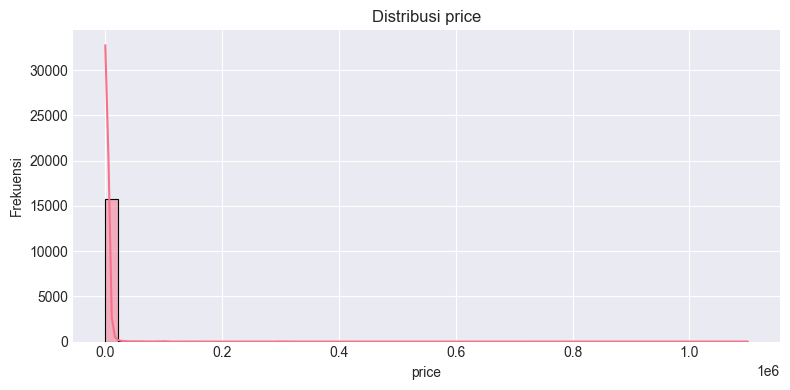

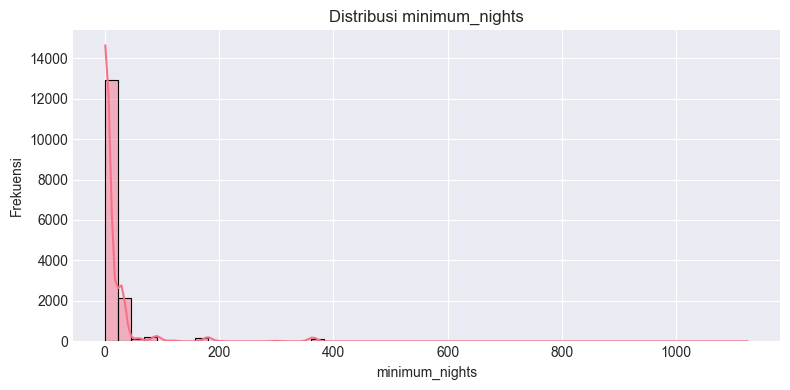

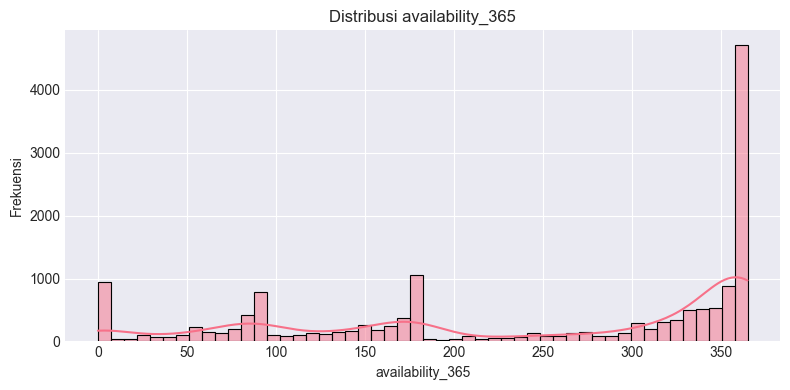

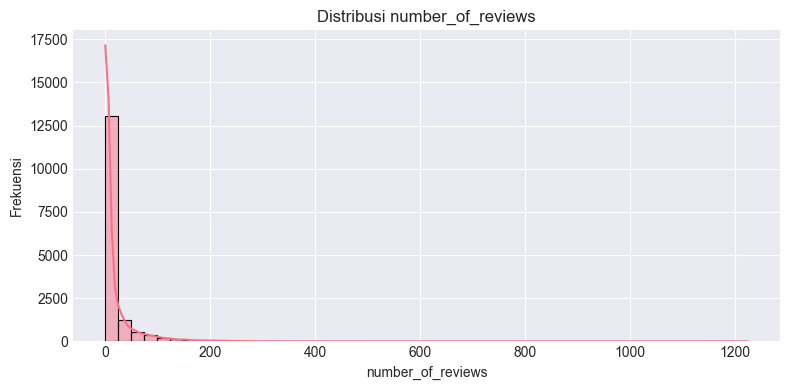

In [70]:
# Numeric Columns Category
num_cols = ['price', 'minimum_nights', 'availability_365', 'number_of_reviews']

# Histogram
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=50)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.tight_layout()
    plt.show()


#### **Interpretation of Numerical Variable Distributions**

1. `price`

- The price distribution is **highly right-skewed.**

- Most listings are **priced in the lower** range (< ฿5,000 per night).

- A small number of extreme high-price outliers (> ฿100,000) are observed, likely representing premium or luxury listings.

2. `minimum_nights`

- The distribution is also **strongly right-skewed.**

- The majority of listings require a **minimum stay of 1–7 nights**, indicating a focus on **short-term rentals.**

- Noticeable **peaks at values** such as 30, 365, and even > 1,000 nights suggest the presence of **long-term stay strategies** or special rental policies by certain hosts.

3. `availability_365`

- The distribution is more spread out compared to other numerical variables.

- **Many listings** are **available for almost the entire year** (365 days), which may indicate **low booking demand or inactive listings.**

- Recurrent values around 30, 90, and 180 days suggest **seasonal or planned availability** strategies by hosts.

4. `number_of_reviews`

- The distribution is **highly right-skewed**, with most listings receiving **few reviews.**

- A **small subset of listings** has very **high review counts** (> 500), indicating long-standing, highly popular, and well-performing listings.

**ConclusionL**

- Nearly all numerical variables exhibit non-normal, right-skewed distributions.

- The presence of outliers in variables such as `price`, `number_of_reviews`, and `minimum_nights` is considered natural and meaningful, rather than data errors.

- These outliers likely represent premium segments, high-performing listings, or long-term rental strategies.

- The observed distributions provide a strong foundation for segmentation and deeper analytical exploration in the subsequent analysis stage.

## **Categorical Distribution**

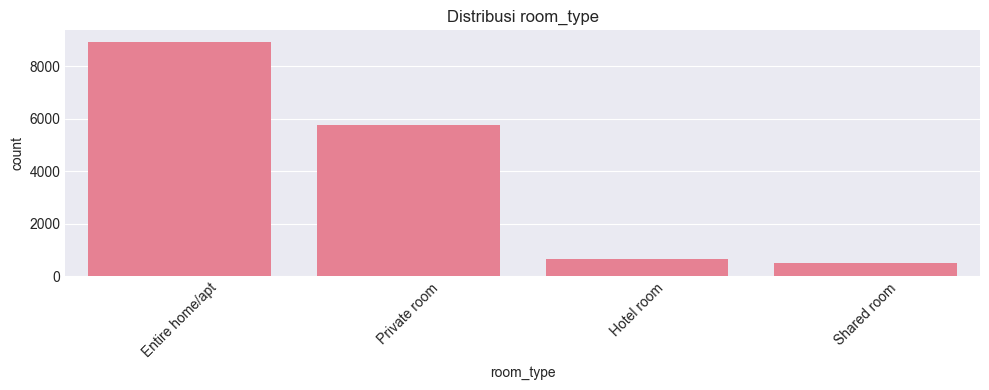

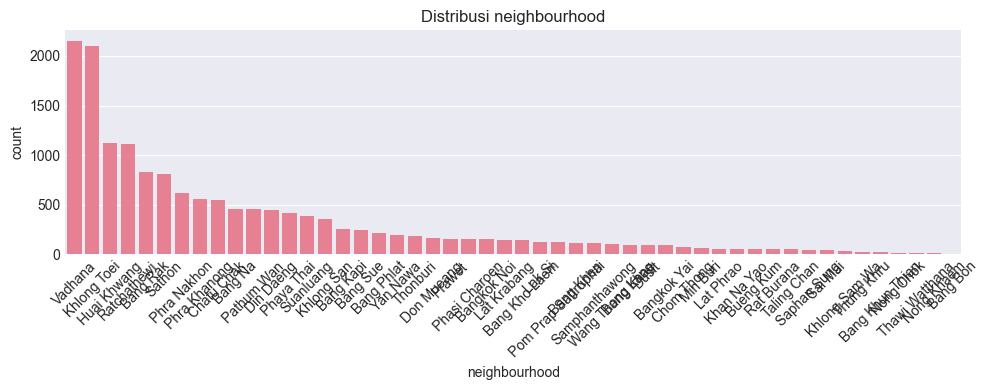

In [71]:
# Categorical
cat_cols = ['room_type', 'neighbourhood']

for col in cat_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=df[col], order=df[col].value_counts().index)
    plt.title(f'Distribusi {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


### **Interpretation of Categorical Variable Distributions**

1. `room_type`:

    - `Entire home/apt` is the dominant category, indicating a strong guest preference for full privacy.

    - `Private room` also accounts for a significant portion of listings, catering to budget-conscious travelers.

    - `Shared room and Hotel` room appear in much smaller proportions, suggesting lower demand or a focus on niche market segments.

2. Neighbourhood:

    - Areas such as Vadhana, Khlong Toei, and Huai Khwang have the highest concentration of listings.

    - These neighbourhoods are likely high-demand locations, potentially due to factors such as proximity to public transportation, tourist attractions, and central business areas.

Initial Insights:

- These categorical distributions provide a foundation for location-based and room-type segmentation analysis.

- The findings can help inform strategic decisions for new hosts or for existing listings aiming to improve their popularity and performance.

## **Listing Activity Trend Based on Last Review Year**

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15845 entries, 0 to 15844
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              15845 non-null  object        
 1   name                            15845 non-null  object        
 2   host_id                         15845 non-null  object        
 3   host_name                       15845 non-null  object        
 4   neighbourhood                   15845 non-null  object        
 5   latitude                        15845 non-null  float64       
 6   longitude                       15845 non-null  float64       
 7   room_type                       15845 non-null  object        
 8   price                           15845 non-null  int64         
 9   minimum_nights                  15845 non-null  int64         
 10  number_of_reviews               15845 non-null  int64         
 11  la

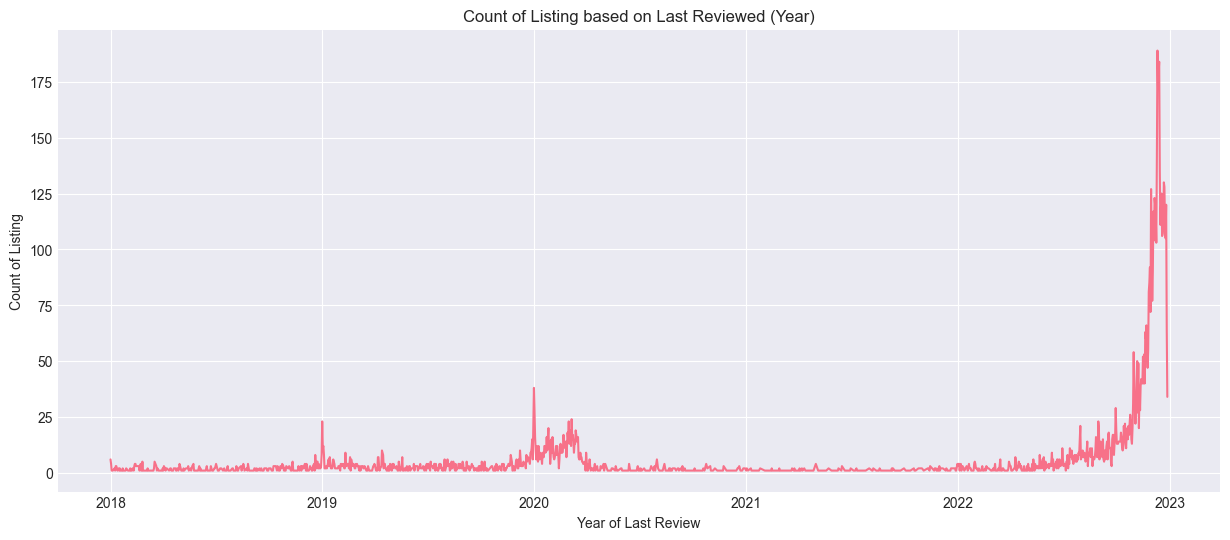

In [73]:
# Membuat line plot
df_line=df.groupby('last_review')['id'].count().reset_index()
df_line1=df_line[df_line['last_review']>'2017-12-31']
plt.figure(figsize=(15, 6))
sns.lineplot(x='last_review', y='id', data=df_line1)
plt.title('Count of Listing based on Last Reviewed (Year)')
plt.xlabel('Year of Last Review')
plt.ylabel('Count of Listing')
plt.grid(True)
plt.show()

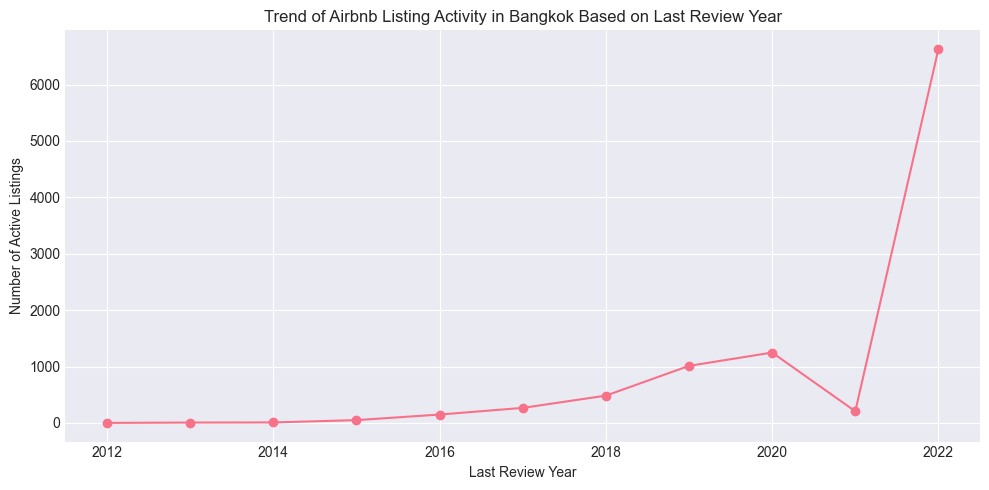

In [74]:
# Prepare data
yearly_activity = (
    df[df['review_year'].notna()]
    .groupby('review_year')
    .size()
    .reset_index(name='num_listings')
)

# Plot
plt.figure(figsize=(10,5))
plt.plot(
    yearly_activity['review_year'],
    yearly_activity['num_listings'],
    marker='o'
)
plt.title('Trend of Airbnb Listing Activity in Bangkok Based on Last Review Year')
plt.xlabel('Last Review Year')
plt.ylabel('Number of Active Listings')
plt.grid(True)
plt.tight_layout()
plt.show()


**INTERPREATION**

The chart shows the number of Airbnb listings in Bangkok by their last review year, which indicates how recently listings received guest activity.

- From 2012 to 2018, the number of active listings grows gradually, suggesting steady market expansion and increasing adoption of Airbnb.

- Activity peaks around 2019–2020, reflecting strong demand and frequent guest stays before the pandemic.

- In 2021, there is a sharp drop in listings with recent reviews, indicating a major decline in guest activity during the COVID-19 period.

- In 2022, the number of listings with recent reviews spikes dramatically, showing a strong post-pandemic recovery in travel demand.

**Key Insight:**

Despite the rebound in 2022, the earlier drop highlights that many listings can remain online but inactive, reinforcing the presence of underperforming or “inactive” listings during demand shocks.

### **Inactive Listing**

In [75]:
inactive_ratio = df['last_review'].isna().mean() * 100
inactive_ratio


np.float64(36.497317765856735)

### **Interpretation:**

Approximately 36% of listings have never received a review, indicating a non-trivial portion of inventory that may be inactive, newly listed, or underperforming.

In [76]:
count_review_yr=df['review_year'].value_counts(0).reset_index()
display(count_review_yr)
print('Tahun 2000 is year default it means no review')

,review_year,count
0,2022.00,6628
1,2020.00,1248
2,2019.00,1012
3,2018.00,484
4,2017.00,267
5,2021.00,207
6,2016.00,149
7,2015.00,50
8,2014.00,9
9,2013.00,7


Tahun 2000 is year default it means no review


In [77]:
# new column; listing status
df['listing_status'] = 'Inactive'
df.loc[df['review_year'].between(2012, 2020), 'listing_status'] = 'Potentially Active'
df.loc[df['review_year'].between(2021, 2022), 'listing_status'] = 'Active'
df.loc[(df['review_year'] == 2000) & (df['availability_365'] < 365), 'listing_status'] = 'New Listing'

# show profiling
df_status=df.groupby(['listing_status','area','neighbourhood'])['id'].count().reset_index()
df_status.sample(10)

,listing_status,area,neighbourhood,id
143,Potentially Active,Urban Fringe,Thawi Watthana,2
139,Potentially Active,Urban Fringe,Sai Mai,3
113,Potentially Active,Inner,Samphanthawong,18
107,Potentially Active,Inner,Khlong Toei,310
35,Active,Urban Fringe,Lat Phrao,11
84,Inactive,Urban Fringe,Nong Khaem,8
36,Active,Urban Fringe,Phasi Charoen,61
121,Potentially Active,Suburban,Lat Krabang,38
97,Potentially Active,Inner,Bang Phlat,46
65,Inactive,Inner,Thonburi,71


In [78]:
df['listing_status'].value_counts()

listing_status
Active                6835
Inactive              5783
Potentially Active    3227
Name: count, dtype: int64

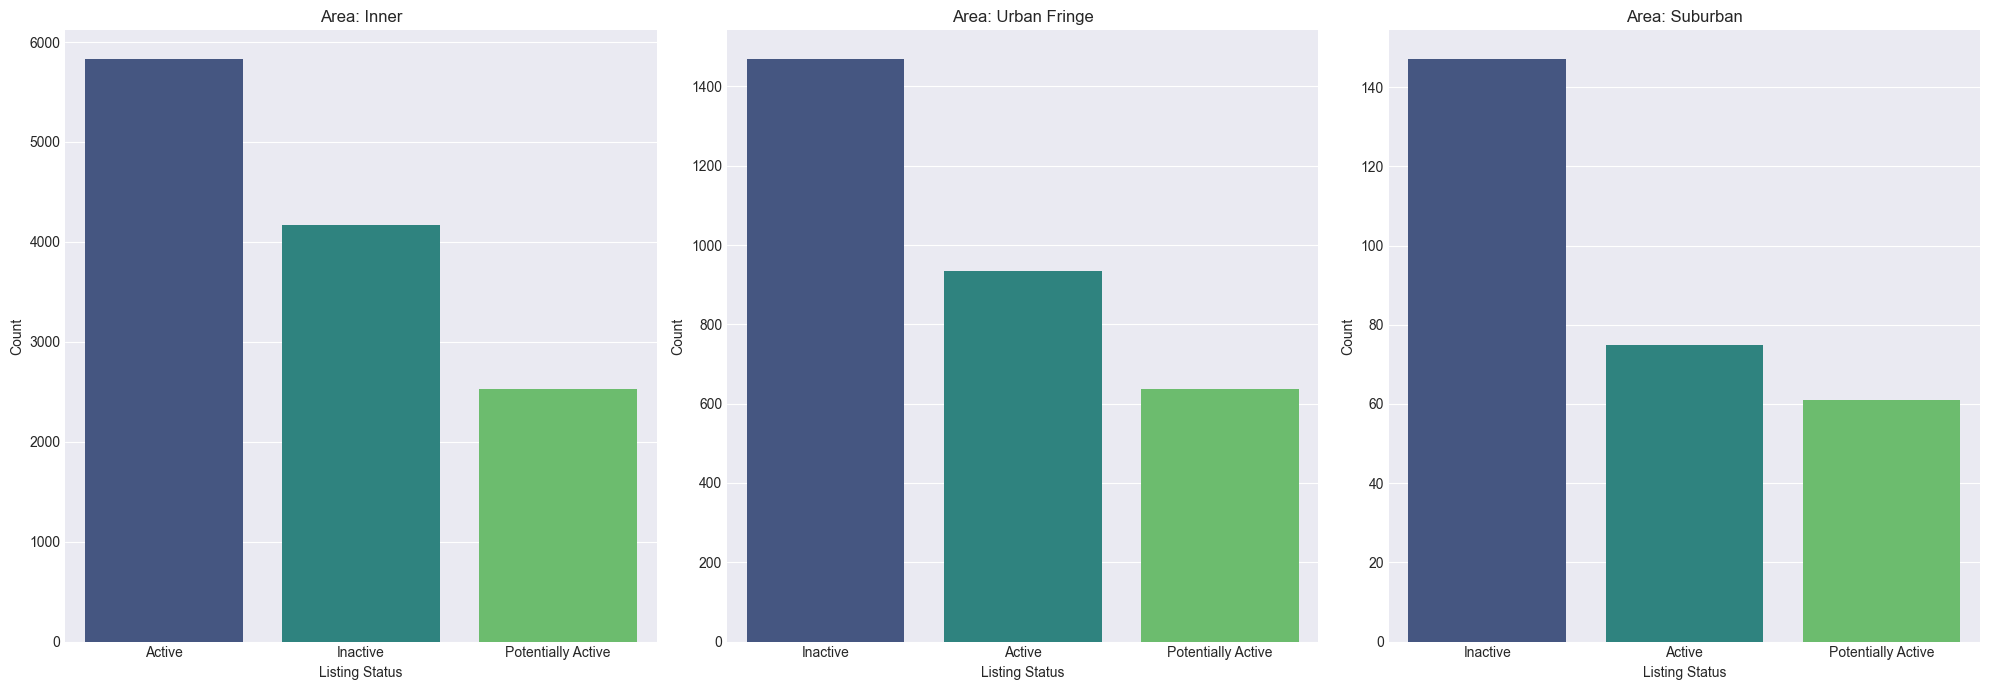

In [79]:
areas = df['area'].unique()

num_rows = 1  # 1 row for all area
num_cols = len(areas)  # 3 coloumn casue has 3 area


fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 7), sharey=False)


for i, area in enumerate(areas):
    area_df = df[df['area'] == area]
    order = area_df['listing_status'].value_counts().index  # Urutan descending berdasarkan jumlah
    sns.countplot(data=area_df, x='listing_status', palette='viridis', order=order, ax=axes[i])
    axes[i].set_title(f'Area: {area}')
    axes[i].set_xlabel('Listing Status')
    axes[i].set_ylabel('Count')


plt.tight_layout()
plt.show()

1. Inner Area

    The Inner Area shows a high proportion of Active listings, indicating strong and consistent demand for short-term rentals. This pattern reflects the area’s high accessibility and concentration of tourist attractions, shopping centers, and nightlife, which collectively support sustained guest activity.

2. Urban Fringe Area

    Listings in the Urban Fringe are more evenly distributed between Active and New Listing statuses. This suggests growing rental activity in the outskirts of Bangkok, potentially driven by infrastructure development, improved accessibility, and a gradual shift of urban expansion toward peripheral areas.

3. Suburban Area

    Although the Suburban Area has fewer total listings, it shows a relatively higher proportion of New Listings compared to Active ones. This indicates emerging growth in accommodation supply. However, the lower number of Potentially Active listings compared to Inactive ones may signal challenges in maintaining consistent demand and long-term activity in these areas.

## **Analysis Strucuture**

**Analysis Objective**

This analysis aims to evaluate the simultaneous impact of multiple listing characteristics on Airbnb listing popularity, measured by the number of reviews (`number_of_reviews`).

The results are intended to:

- Quantify the relative influence of factors such as `room type`, `price`, `availability`, and `minimum stay`.

- Provide data-driven insights to support strategic decisions for hosts and the Airbnb platform.

**Model Selection Rationale:** Poisson Generalized Linear Model (GLM)

- The dependent variable number_of_reviews represents count data (non-negative integers).

- The distribution of reviews is right-skewed, violating the assumptions of ordinary least squares (OLS) regression.

- A Poisson GLM with a log link function is therefore an appropriate and widely used approach for modeling count-based outcomes.


| Variable Type | Variable Name     | Data Type   | Description                                                           |
| ------------- | ----------------- | ----------- | --------------------------------------------------------------------- |
| Target        | number_of_reviews | Count       | Total number of reviews as a proxy for listing popularity             |
| Predictor     | room_type         | Categorical | Type of room (Entire home/apt, Private room, Shared room, Hotel room) |
| Predictor     | price             | Numeric     | Listing price per night (in THB)                                      |
| Predictor     | availability_365  | Numeric     | Number of days the listing is available in a year                     |
| Predictor     | minimum_nights    | Numeric     | Minimum required stay duration                                        |


## **Statistical Testing and Hypotheses**

**Test Used:**

- Wald Test (Z-test) is applied to assess whether each coefficient in the model is statistically significant.

- Statistical significance is evaluated using Z-scores and p-values.

| Hypothesis | Description                                                   |
| ---------- | ------------------------------------------------------------- |
| H₀         | Coefficient = 0 (no significant effect on listing popularity) |
| H₁         | Coefficient ≠ 0 (significant effect on listing popularity)    |


Decision Rule:

- p-value < 0.05 : the predictor has a statistically significant effect

- p-value ≥ 0.05 : the predictor does not have a statistically significant effect

GLM Poisson

In [80]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# model regression Poisson
model_poisson = smf.glm(
    formula='number_of_reviews ~ C(room_type) + price + availability_365 + minimum_nights',
    data=df,
    family=sm.families.Poisson()
).fit()

# Tampilkan ringkasan model
print(model_poisson.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:      number_of_reviews   No. Observations:                15845
Model:                            GLM   Df Residuals:                    15838
Model Family:                 Poisson   Df Model:                            6
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -3.5916e+05
Date:                Fri, 06 Feb 2026   Deviance:                   6.7780e+05
Time:                        18:44:00   Pearson chi2:                 1.76e+06
No. Iterations:                     6   Pseudo R-squ. (CS):             0.9703
Covariance Type:            nonrobust                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

**Poisson GLM Interpretation**

**Objective**

To assess whether room type, price, availability, and minimum nights significantly affect Airbnb listing popularity (`number_of_reviews`).

**Method**

- Model: Poisson Regression (GLM)

- Rationale: Review counts are skewed, non-negative count data

**Key Findings**

- All variables are statistically significant (p < 0.001).

- Entire `home/apartment` listings are the **most popular**.

- Private and shared rooms receive substantially **fewer reviews**.

- Higher prices slightly reduce review counts.

- Longer minimum stay requirements lower listing popularity.

- Excessive availability is associated with lower engagement.

Business Implications

- Prioritize `Entire home/apartment` listings

- Keep **minimum stay flexible (≤ 3 nights)**

- Apply competitive **pricing strategies**

- High availability must be paired with strong listing appeal

## **Total Listings Airbnb in Bangkok**

In [81]:
print(f"Total Listings in Bangkok = {df.shape[0]}")

Total Listings in Bangkok = 15845


In [82]:
df_area = df.groupby('area')['id'].count().reset_index(name='count')
print("Total Listings Airbnb based Area")
df_area

Total Listings Airbnb based Area


,area,count
0,Inner,12522
1,Suburban,283
2,Urban Fringe,3040


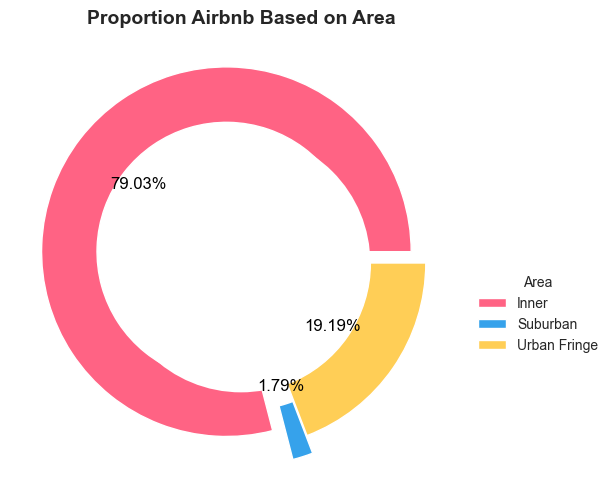

In [83]:
plt.figure(figsize=(10,6))
colors = ['#FF6384', '#36A2EB', '#FFCE56']
wedges, texts, autotexts = plt.pie(x=df_area['count'], autopct='%.2f%%',
        textprops={'color': 'black', 'fontname': 'arial', 'fontsize': 12},
        explode=(0.1, 0.1, 0), colors=colors,
        wedgeprops={'width': 0.3, 'edgecolor': 'white'})  # Creates donut chart

# Add a circle at the center to complete the donut look
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.legend(df_area['area'], title='Area', loc='upper right',
           bbox_to_anchor=(1.3, 0.5))
plt.title('Proportion Airbnb Based on Area',
          fontweight='bold', fontsize=14)
plt.show()

#### **Insight**

The distribution of Airbnb listings in Bangkok is heavily concentrated in `Inner` areas, 79% of total listings. 

- `Inner Bangkok` (city’s core districts)
    - The main centers for business, commerce, culture, and government activities.
    - High population density, well-developed infrastructure, and excellent access to mass transit
    - Most major tourist attractions, shopping districts, and the Central Business District (CBD) are located here.

    This indicates that the Airbnb supply is strongly centralized in **core urban districts**, likely due to better accessibility, proximity to tourist attractions, business centers, and public transportation.

- The `Urban Fringe` 

    - Still connected to Inner Bangkok
    - Have lower population density and more mixed land use.
    - Serve as alternatives for travelers seeking  **more affordable prices** while still maintaining reasonable access to the city center

- `Suburban` 
    - located farther from the city center
    - characterized by low density, larger residential properties, and limited commercial activity
    - these areas are typically less attractive to short-term visitors

Overall, this distribution suggests that **location plays a critical role in market competition**. 

Listings in `Inner` areas face **high competition** but **strong demand** , while listings outside the core may struggle to attract guests despite potentially lower prices.

## **Distribution of Room Types**

                                                  ROOM TYPE DISTRIBUTION
____________________________________________________________________________________________________________________________________________________________________________________


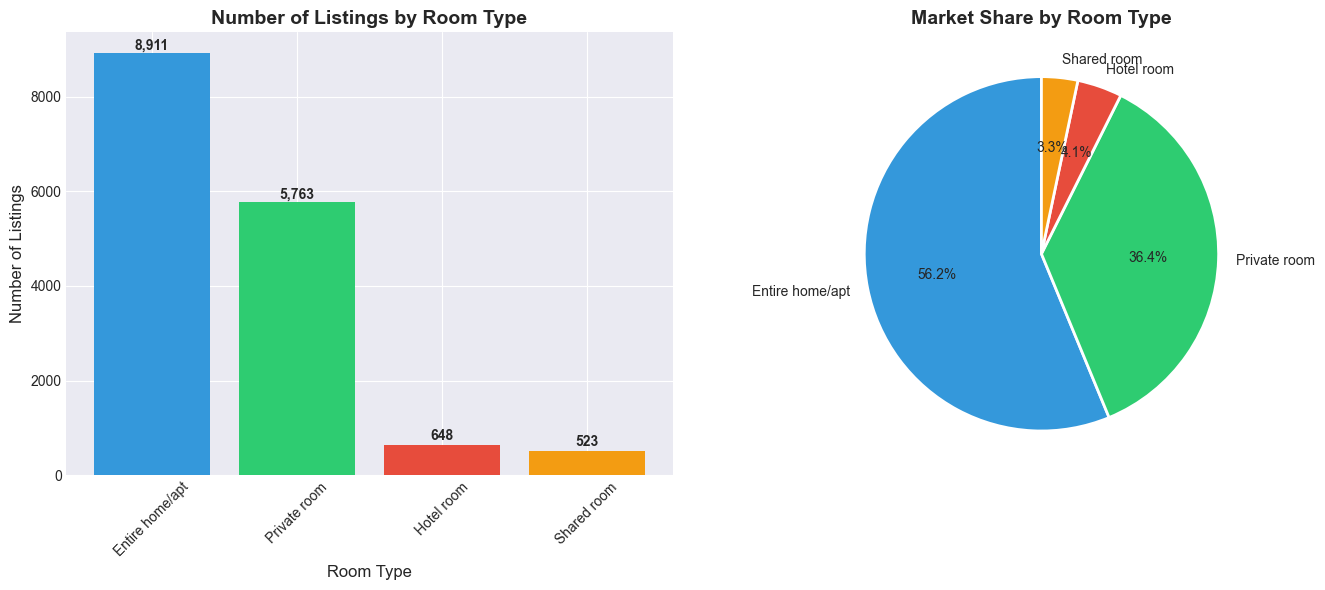


ROOM TYPE STATISTICS:


,Count,Avg Price (฿),Median Price (฿),Avg Reviews,Avg Availability (days)
room_type,,,,,
Entire home/apt,8911,3465.59,1536.00,22.21,225.27
Hotel room,648,3032.98,1700.00,19.60,263.55
Private room,5763,3066.37,1214.00,8.80,269.34
Shared room,523,919.76,500.00,5.13,270.15



INSIGHT:
• Entire home/apt listings dominate the market (56.2% of all listings)
• This suggests entire home/apts are the primary accommodation type offered


In [84]:
# Distribution of Room Types
print("                                                  ROOM TYPE DISTRIBUTION")
print("___"*60)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Left: Count of each room type
room_counts = df['room_type'].value_counts()
bars = axes[0].bar(room_counts.index, room_counts.values, 
                   color=['#3498db', '#2ecc71', '#e74c3c', '#f39c12'])
axes[0].set_title('Number of Listings by Room Type', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Room Type', fontsize=12)
axes[0].set_ylabel('Number of Listings', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# Add count labels on bars
for i, (room_type, count) in enumerate(room_counts.items()):
    axes[0].text(i, count + max(room_counts.values)*0.01, 
                f'{count:,}', ha='center', fontsize=10, fontweight='bold')

# Right: Percentage distribution
axes[1].pie(room_counts.values, labels=room_counts.index, 
           autopct='%1.1f%%', startangle=90,
           colors=['#3498db', '#2ecc71', '#e74c3c', '#f39c12'],
           wedgeprops={'edgecolor': 'white', 'linewidth': 2})
axes[1].set_title('Market Share by Room Type', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Room type statistics
print("\nROOM TYPE STATISTICS:")
room_type_stats = df.groupby('room_type').agg({
    'price': ['count', 'mean', 'median'],
    'number_of_reviews': 'mean',
    'availability_365': 'mean'
}).round(2)

room_type_stats.columns = ['Count', 'Avg Price (฿)', 'Median Price (฿)', 
                          'Avg Reviews', 'Avg Availability (days)']
display(room_type_stats)

print("\nINSIGHT:")
dominant_type = room_counts.index[0]
dominant_pct = room_counts.iloc[0] / len(df) * 100
print(f"• {dominant_type} listings dominate the market ({dominant_pct:.1f}% of all listings)")
print(f"• This suggests {dominant_type.lower()}s are the primary accommodation type offered")

## **Geographical Distribution**

                                                   GEOGRAPHICAL DISTRIBUTION
____________________________________________________________________________________________________________________________________________________________________________________


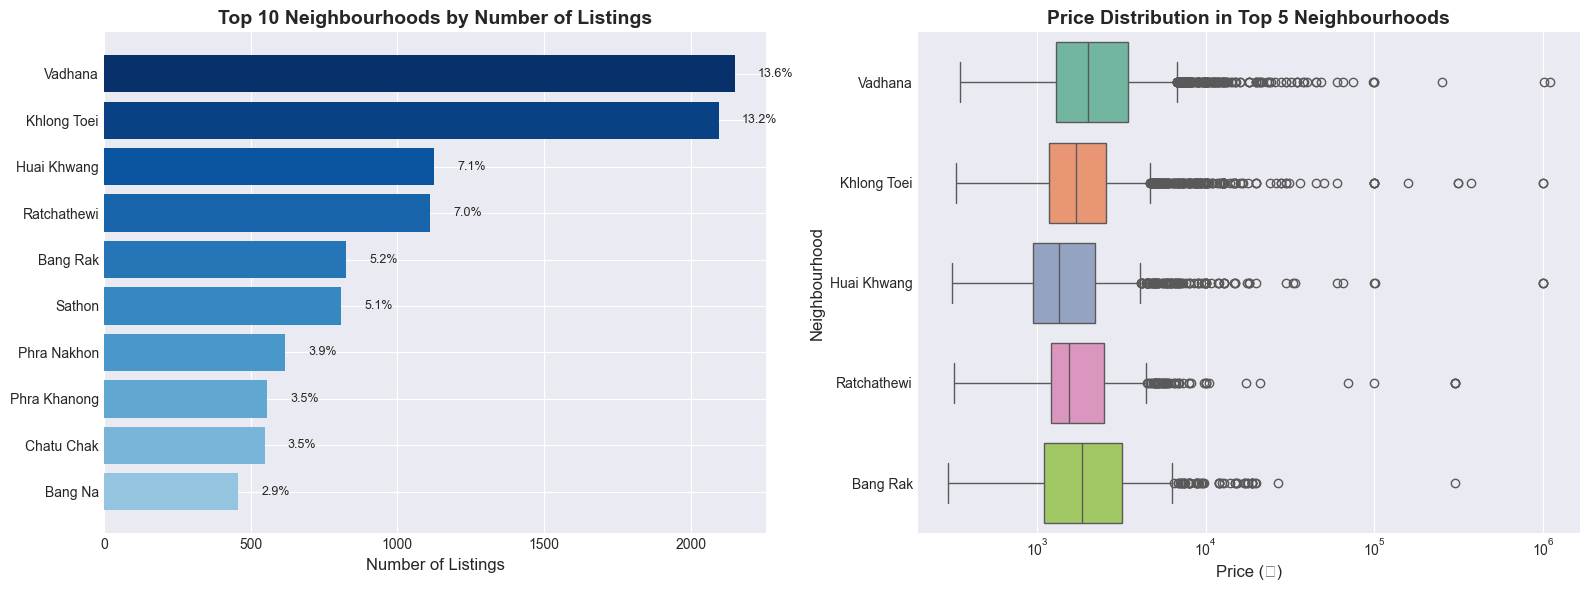


 TOP 5 NEIGHBOURHOODS STATISTICS:
____________________________________________________________________________________________________________________________________________________________________________________


,Avg Price (฿),Median Price (฿),Avg Reviews,Avg Availability (days)
neighbourhood,,,,
Huai Khwang,5036.08,1351.00,16.13,200.47
Vadhana,4455.55,2000.00,17.40,227.21
Khlong Toei,4250.95,1700.00,19.69,231.95
Ratchathewi,3201.31,1536.00,18.59,257.69
Bang Rak,3056.34,1850.00,21.35,247.68


In [85]:
#Geographical Distribution
print("                                                   GEOGRAPHICAL DISTRIBUTION")
print("___"*60)

# Find the column for area/neighbourhood
area_col = 'neighbourhood' if 'neighbourhood' in df.columns else 'area'
if area_col not in df.columns:
    # Try to find any geographical column
    geo_cols = [col for col in df.columns if 'neighbour' in col.lower() or 'area' in col.lower()]
    area_col = geo_cols[0] if geo_cols else 'neighbourhood_group'
    print(f"Using '{area_col}' as geographical identifier")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Left: Top 10 neighbourhoods by listing count
top_areas = df[area_col].value_counts().head(10)
bars = axes[0].barh(range(len(top_areas)), top_areas.values[::-1],
                   color=plt.cm.Blues(np.linspace(0.4, 1, len(top_areas))))
axes[0].set_yticks(range(len(top_areas)))
axes[0].set_yticklabels(top_areas.index[::-1])
axes[0].set_title(f'Top 10 {area_col.title()}s by Number of Listings', 
                  fontsize=14, fontweight='bold')
axes[0].set_xlabel('Number of Listings', fontsize=12)

# Add percentage labels
total_listings = len(df)
for i, (area, count) in enumerate(top_areas[::-1].items()):
    percentage = (count / total_listings) * 100
    axes[0].text(count + total_listings*0.005, i, 
                f'{percentage:.1f}%', va='center', fontsize=9)

# Right: Price distribution by top 5 areas
top_5_areas = top_areas.head(5).index.tolist()
area_price_data = df[df[area_col].isin(top_5_areas)].copy()

sns.boxplot(data=area_price_data, x='price', y=area_col, 
            order=top_5_areas, ax=axes[1], palette='Set2')
axes[1].set_title(f'Price Distribution in Top 5 {area_col.title()}s', 
                  fontsize=14, fontweight='bold')
axes[1].set_xlabel('Price (฿)', fontsize=12)
axes[1].set_ylabel(area_col.title(), fontsize=12)
axes[1].set_xscale('log')  # Log scale for better visualization

plt.tight_layout()
plt.show()

# Area statistics
print(f"\n TOP 5 {area_col.upper()}S STATISTICS:")
print("___"*60)
top_areas_stats = df[df[area_col].isin(top_5_areas)].groupby(area_col).agg({
    'price': ['mean', 'median'],
    'number_of_reviews': 'mean',
    'availability_365': 'mean'
}).round(2)

top_areas_stats.columns = ['Avg Price (฿)', 'Median Price (฿)', 
                          'Avg Reviews', 'Avg Availability (days)']
display(top_areas_stats.sort_values('Avg Price (฿)', ascending=False))

#### Insight

In [86]:
print("\n BUSINESS INSIGHT:")
print("___"*60)
print(f"• The top 5 {area_col}s contain {top_areas.head(5).sum()/total_listings*100:.1f}% of all listings")
print(f"• This indicates high concentration of supply in certain areas")
print(f"• Price variation across areas suggests different market segments")


 BUSINESS INSIGHT:
____________________________________________________________________________________________________________________________________________________________________________________
• The top 5 neighbourhoods contain 46.1% of all listings
• This indicates high concentration of supply in certain areas
• Price variation across areas suggests different market segments


## **Price Distribution Seeking**

In [87]:
# Show total listings by area
df_area

,area,count
0,Inner,12522
1,Suburban,283
2,Urban Fringe,3040


**Average `price` based on `area` and `room_type`**

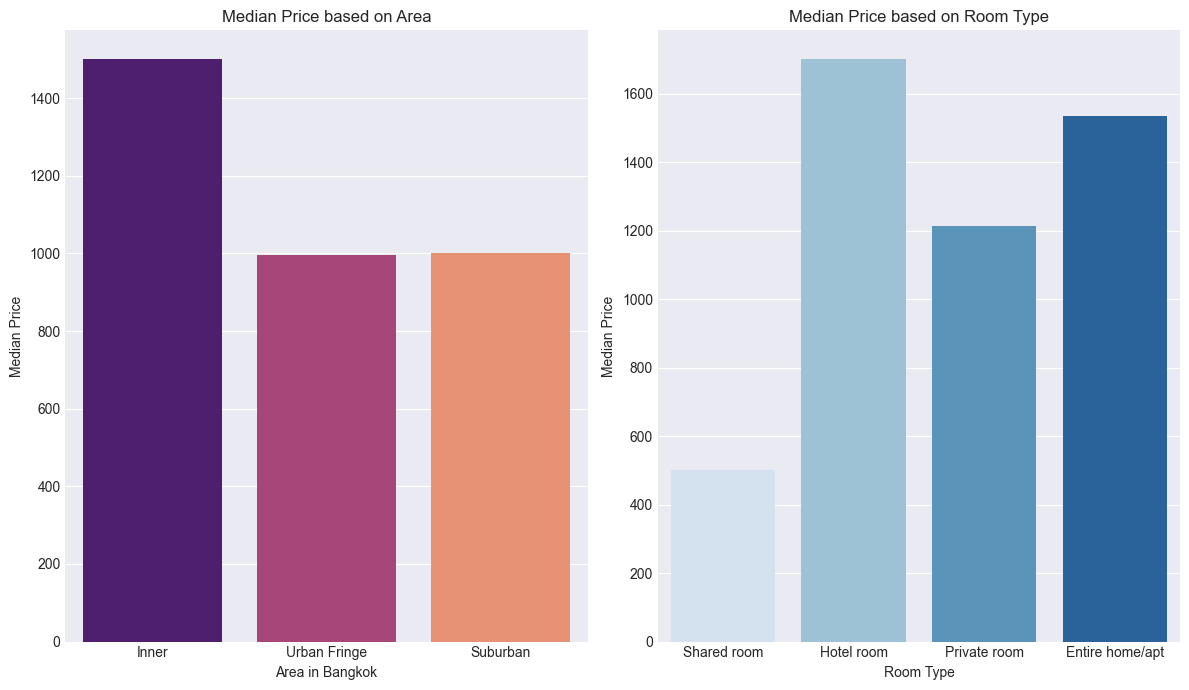

In [88]:
# Subplot for median price based on area
plt.figure(figsize=(12, 7))
plt.subplot(1, 2, 1)
sns.barplot(x='area', y='price', data=df, palette='magma', estimator=np.median, ci=None, order=df.groupby('area')['price'].mean().sort_values(ascending=False).index)
plt.title('Median Price based on Area')
plt.ylabel('Median Price')
plt.xlabel('Area in Bangkok')

# Subplot for median price based on room type
plt.subplot(1, 2, 2)
sns.barplot(
    x='room_type',
    y='price',
    data=df,
    palette='Blues',
    estimator=np.median,
    ci=None,
    order=df.groupby('room_type')['price'].mean().sort_values(ascending=True).index
)
plt.title('Median Price based on Room Type')
plt.ylabel('Median Price')
plt.xlabel('Room Type')

plt.tight_layout()
plt.show()


DISTRIBUTION OF PRICE


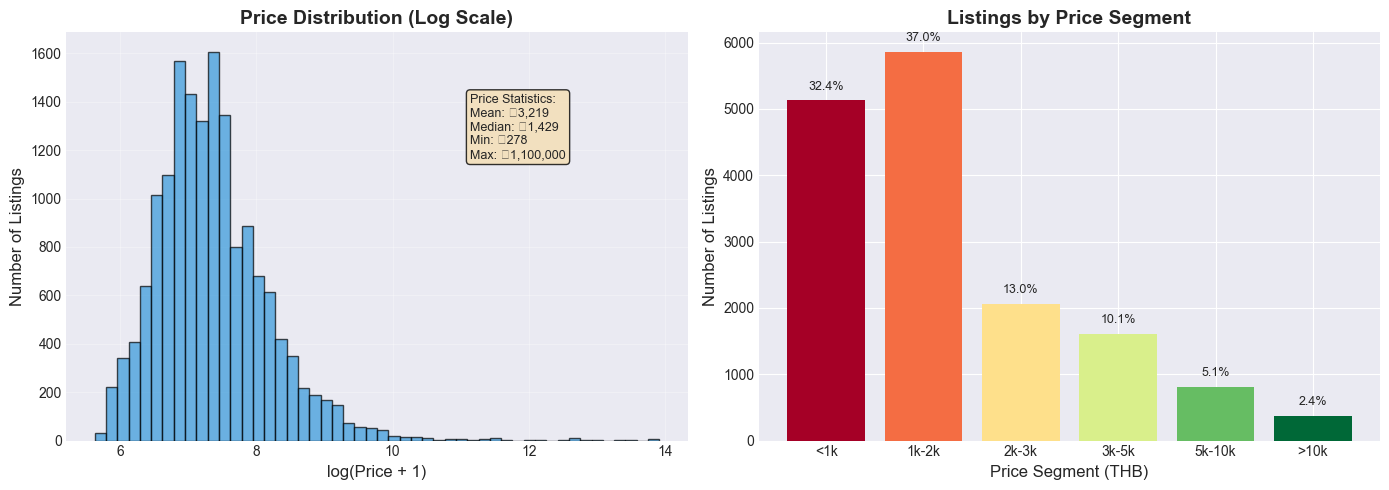

In [89]:
# Distribution of price
print("DISTRIBUTION OF PRICE")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Price histogram (log scale)
price_log = np.log1p(df['price'])
axes[0].hist(price_log, bins=50, edgecolor='black', alpha=0.7, color='#3498db')
axes[0].set_title('Price Distribution (Log Scale)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('log(Price + 1)', fontsize=12)
axes[0].set_ylabel('Number of Listings', fontsize=12)
axes[0].grid(True, alpha=0.3)

# Add statistics annotation
price_stats = f"""Price Statistics:
Mean: ฿{df['price'].mean():,.0f}
Median: ฿{df['price'].median():,.0f}
Min: ฿{df['price'].min():,.0f}
Max: ฿{df['price'].max():,.0f}"""
axes[0].text(0.65, 0.85, price_stats, transform=axes[0].transAxes,
             fontsize=9, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# Price segments
price_segments = pd.cut(df['price'], 
                       bins=[0, 1000, 2000, 3000, 5000, 10000, float('inf')],
                       labels=['<1k', '1k-2k', '2k-3k', '3k-5k', '5k-10k', '>10k'])
segment_counts = price_segments.value_counts().sort_index()

bars = axes[1].bar(segment_counts.index, segment_counts.values,
                  color=plt.cm.RdYlGn(np.linspace(0, 1, len(segment_counts))))
axes[1].set_title('Listings by Price Segment', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Price Segment (THB)', fontsize=12)
axes[1].set_ylabel('Number of Listings', fontsize=12)

# Add percentage labels
for i, (segment, count) in enumerate(segment_counts.items()):
    percentage = (count / total_listings) * 100
    axes[1].text(i, count + total_listings*0.01, f'{percentage:.1f}%', 
                ha='center', fontsize=9)

plt.tight_layout()
plt.show()

### **Interpretation — Price Distribution**

- The `price` distribution of Airbnb listings in Bangkok is right-skewed, indicating that most listings are concentrated in the **lower-to-mid price** range, while a smaller number of listings are priced significantly higher.

- The median `price` is notably lower than the mean price, suggesting the presence of **high-priced premium listings** that pull the average upward. This highlights a market structure **dominated by budget and mid-range accommodations**, with a **smaller but visible luxury segment**.

- `Price` segmentation further confirms this pattern, where the majority of listings fall below THB 2,000 per night, while listings priced above THB 5,000 represent a relatively **small portion of the overall supply**.

Overall, the Bangkok Airbnb market is characterized by a highly competitive price landscape, where most listings operate within a narrow and affordable price band

## **Distribution of availability_365**


 DISTRIBUTION OF AVAILABILITY


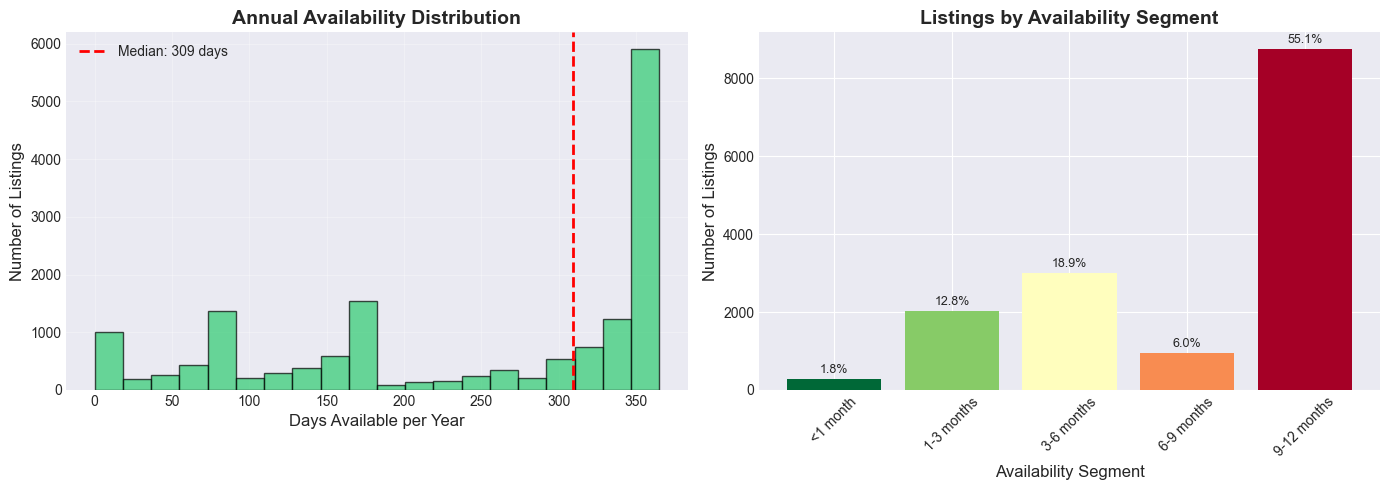

In [90]:
# Distribution of availability_365
print("\n DISTRIBUTION OF AVAILABILITY")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Availability histogram
axes[0].hist(df['availability_365'], bins=20, edgecolor='black', 
            alpha=0.7, color='#2ecc71')
axes[0].axvline(x=df['availability_365'].median(), color='red', 
               linestyle='--', linewidth=2,
               label=f'Median: {df["availability_365"].median():.0f} days')
axes[0].set_title('Annual Availability Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Days Available per Year', fontsize=12)
axes[0].set_ylabel('Number of Listings', fontsize=12)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Availability segments
availability_segments = pd.cut(df['availability_365'], 
                              bins=[0, 30, 90, 180, 270, 365],
                              labels=['<1 month', '1-3 months', '3-6 months', 
                                      '6-9 months', '9-12 months'])
avail_seg_counts = availability_segments.value_counts().sort_index()

bars = axes[1].bar(avail_seg_counts.index, avail_seg_counts.values,
                  color=plt.cm.RdYlGn_r(np.linspace(0, 1, len(avail_seg_counts))))
axes[1].set_title('Listings by Availability Segment', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Availability Segment', fontsize=12)
axes[1].set_ylabel('Number of Listings', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

# Add percentage labels
for i, (segment, count) in enumerate(avail_seg_counts.items()):
    percentage = (count / total_listings) * 100
    axes[1].text(i, count + total_listings*0.01, f'{percentage:.1f}%', 
                ha='center', fontsize=9)

plt.tight_layout()
plt.show()

**Interpretation:**

A significant portion of listings show **high availability** (9-12 months), suggesting many properties are consistently **available for booking**. This provides context for potential occupancy challenges

### **SUMMARY**

In [91]:
print("\n" + "__"*70)
print("\n                                               SUMMARY - MARKET CONTEXT")
print("__"*70)
print(f"• Total listings: {total_listings:,}")
print(f"• Dominant room type: {room_counts.index[0]} ({room_counts.iloc[0]/total_listings*100:.1f}%)")
print(f"• Median price: ฿{df['price'].median():,.0f}")
print(f"• Median availability: {df['availability_365'].median():.0f} days/year")
print(f"• Listings available year-round: {avail_seg_counts['9-12 months']/total_listings*100:.1f}%")
print("__"*70)


____________________________________________________________________________________________________________________________________________

                                               SUMMARY - MARKET CONTEXT
____________________________________________________________________________________________________________________________________________
• Total listings: 15,845
• Dominant room type: Entire home/apt (56.2%)
• Median price: ฿1,429
• Median availability: 309 days/year
• Listings available year-round: 55.1%
____________________________________________________________________________________________________________________________________________


## **CHARACTERISTICS OF POPULAR VS LOW-PERFORMING LISTINGS**

Goal: To clearly classify Airbnb listings in Bangkok into high-performing and low-performing segments in order to identify factors that prevent some listings from capturing market demand

benchmark of “success” and “underperformance”

Primary metric: `number_of_reviews`

Listings are classified into two groups:

1. High-Performing Listings
    Listings with `number_of_reviews` above the chosen threshold

2. Low-Performing Listings
    Listings with `number_of_reviews` at or below the threshold

In [92]:
# Analyze review distribution
print("\nREVIEW DISTRIBUTION ANALYSIS")

# Calculate review statistics
zero_reviews = (df['number_of_reviews'] == 0).sum()
one_to_nine = ((df['number_of_reviews'] >= 1) & (df['number_of_reviews'] <= 9)).sum()
ten_plus = (df['number_of_reviews'] >= 10).sum()

print(f"Total listings: {total_listings:,}")
print(f"0 reviews: {zero_reviews:,} ({zero_reviews/total_listings*100:.1f}%)")
print(f"1-9 reviews: {one_to_nine:,} ({one_to_nine/total_listings*100:.1f}%)")
print(f"10+ reviews: {ten_plus:,} ({ten_plus/total_listings*100:.1f}%)")

# Show percentiles for objective threshold selection
print("\n REVIEW DISTRIBUTION PERCENTILES:")
percentiles = df['number_of_reviews'].quantile([0, 0.25, 0.5, 0.75, 0.9, 1])
for p, value in percentiles.items():
    print(f"  {p*100:.0f}th percentile: {value:.0f} reviews")


REVIEW DISTRIBUTION ANALYSIS
Total listings: 15,845
0 reviews: 5,783 (36.5%)
1-9 reviews: 5,391 (34.0%)
10+ reviews: 4,671 (29.5%)

 REVIEW DISTRIBUTION PERCENTILES:
  0th percentile: 0 reviews
  25th percentile: 0 reviews
  50th percentile: 2 reviews
  75th percentile: 13 reviews
  90th percentile: 48 reviews
  100th percentile: 1224 reviews


In [93]:
#Define performance groups
print("\nDEFINE PERFORMANCE GROUPS")

# Definition: 10+ reviews = Popular, 0 reviews = Low-performing
POPULAR_THRESHOLD = 10

df['performance_group'] = np.where(
    df['number_of_reviews'] >= POPULAR_THRESHOLD, 'Popular',
    np.where(df['number_of_reviews'] == 0, 'Low', 'Medium')
)

# Calculate distribution
performance_counts = df['performance_group'].value_counts()
performance_pct = df['performance_group'].value_counts(normalize=True) * 100

print("PERFORMANCE DISTRIBUTION:")
for group in ['High Popularity', 'Medium', 'Low Popularity']:
    count = performance_counts.get(group, 0)
    pct = performance_pct.get(group, 0)
    print(f"  {group}: {count:,} listings ({pct:.1f}%)")


DEFINE PERFORMANCE GROUPS
PERFORMANCE DISTRIBUTION:
  High Popularity: 0 listings (0.0%)
  Medium: 5,391 listings (34.0%)
  Low Popularity: 0 listings (0.0%)



 PERFORMANCE DISTRIBUTION


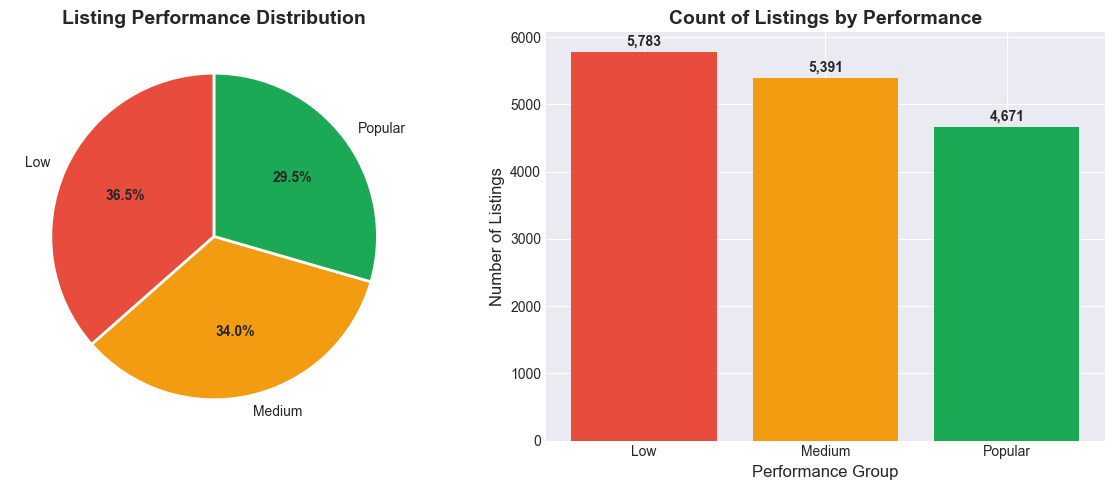

In [94]:
# Visualize the distribution
print("\n PERFORMANCE DISTRIBUTION")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Pie chart
colors = {'Popular':"#1ca956", 'Medium': '#f39c12', 'Low': '#e74c3c'}
wedges, texts, autotexts = axes[0].pie(
    performance_counts.values,
    labels=performance_counts.index,
    autopct='%1.1f%%',
    colors=[colors[group] for group in performance_counts.index],
    startangle=90,
    wedgeprops={'edgecolor': 'white', 'linewidth': 2}
)
axes[0].set_title('Listing Performance Distribution', fontsize=14, fontweight='bold')

# Make percentages bold
for autotext in autotexts:
    autotext.set_fontweight('bold')

# Bar chart with counts
bars = axes[1].bar(performance_counts.index, performance_counts.values,
                  color=[colors[group] for group in performance_counts.index])
axes[1].set_title('Count of Listings by Performance', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Performance Group', fontsize=12)
axes[1].set_ylabel('Number of Listings', fontsize=12)

# Add count labels
for bar in bars:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height + 50,
                f'{int(height):,}', ha='center', va='bottom', 
                fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

Most Airbnb listings in Bangkok fall into the low-performing category.

- Low-performing listings dominate the market
    A large proportion of listings fall into the Low performance category, indicating that **many hosts struggle to consistently capture market demand.**

- Only a small fraction of listings are truly popular
    The Popular segment represents **a minority**, suggesting that sustained success on Airbnb is achieved by relatively few listings.

- Medium-performing listings form a transition group
    These listings show some demand but have **not reached strong, consistent popularity.** This segment represents the **highest improvement potential.**

- Market inefficiency is evident
    The gap between Low and Popular listings highlights that demand is not evenly distributed, and success is driven by specific listing characteristics rather than supply volume alone.

In [95]:
# SECTION SUMMARY
print("\n" + "___"*70)
print("\n                                               SUMMARY - PERFORMANCE DEFINITION")
print("__"*70)
print(f"DEFINITION:")
print(f"   • POPULAR: ≥{POPULAR_THRESHOLD} reviews")
print(f"   • LOW-PERFORMING: 0 reviews")
print(f"   • MEDIUM: 1-{POPULAR_THRESHOLD-1} reviews")
print(f"\n DISTRIBUTION:")
print(f"   • Total listings analyzed: {total_listings:,}")
print(f"   • Popular listings: {performance_counts.get('Popular', 0):,} ({performance_pct.get('Popular', 0):.1f}%)")
print(f"   • Low-performing listings: {performance_counts.get('Low', 0):,} ({performance_pct.get('Low', 0):.1f}%)")


__________________________________________________________________________________________________________________________________________________________________________________________________________________

                                               SUMMARY - PERFORMANCE DEFINITION
____________________________________________________________________________________________________________________________________________
DEFINITION:
   • POPULAR: ≥10 reviews
   • LOW-PERFORMING: 0 reviews
   • MEDIUM: 1-9 reviews

 DISTRIBUTION:
   • Total listings analyzed: 15,845
   • Popular listings: 4,671 (29.5%)
   • Low-performing listings: 5,783 (36.5%)


#### **Price vs Popularity**

Goal: Identify what differentiates successful from low-performing listings

In [96]:
# Create separate dataframes for comparison
popular_df = df[df['performance_group'] == 'Popular']
low_df = df[df['performance_group'] == 'Low']

print(f"COMPARISON GROUPS:")
print(f"   • Popular listings: {len(popular_df):,}")
print(f"   • Low-performing listings: {len(low_df):,}")

COMPARISON GROUPS:
   • Popular listings: 4,671
   • Low-performing listings: 5,783



__________________________________________________________________________________________________________________________________________________________________________________________________________________
PRICE vs POPULARITY
__________________________________________________________________________________________________________________________________________________________________________________________________________________
📊 PRICE STATISTICS (THB):


,Popular,Low-performing
count,4671.00,5783.00
mean,3318.00,3425.00
50%,1466.00,1500.00
std,30470.00,21168.00
min,304.00,278.00
max,1000000.00,1100000.00


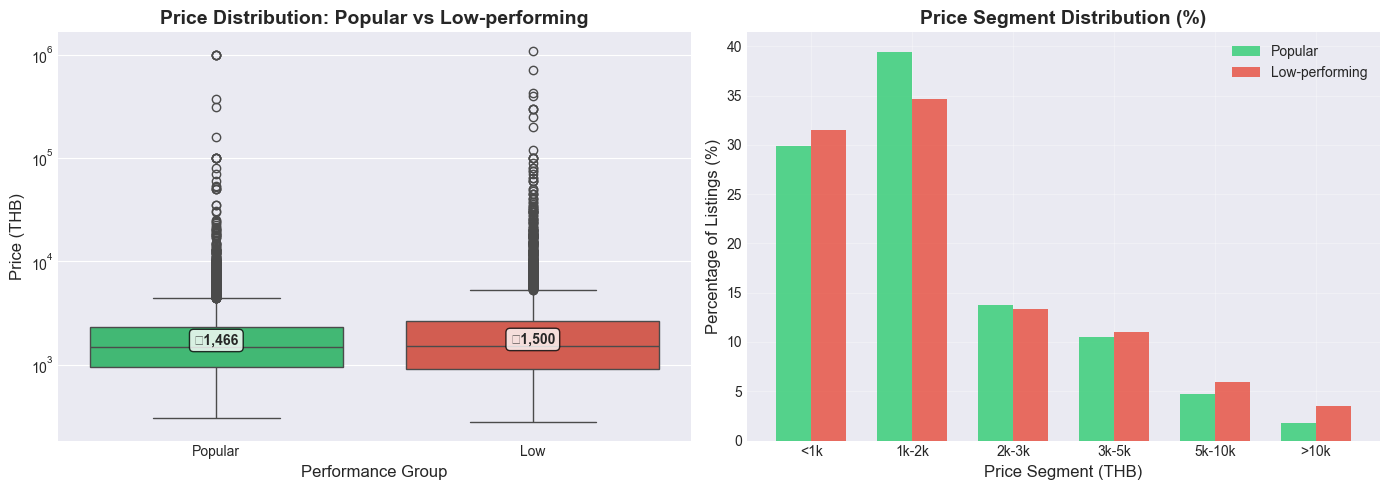

In [97]:
print("\n" + "___"*70)
print("PRICE vs POPULARITY")
print("___"*70)

# Calculate price statistics
price_stats = pd.DataFrame({
    'Popular': popular_df['price'].describe(),
    'Low-performing': low_df['price'].describe()
}).round(0)

print("📊 PRICE STATISTICS (THB):")
display(price_stats[['Popular', 'Low-performing']].loc[['count', 'mean', '50%', 'std', 'min', 'max']])

# Visualize price distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Box plot comparison
sns.boxplot(data=df[df['performance_group'].isin(['Popular', 'Low'])], 
            x='performance_group', y='price', order=['Popular', 'Low'],
            ax=axes[0], palette=['#2ecc71', '#e74c3c'])
axes[0].set_title('Price Distribution: Popular vs Low-performing', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Performance Group', fontsize=12)
axes[0].set_ylabel('Price (THB)', fontsize=12)
axes[0].set_yscale('log')

# Add median price labels
for i, group in enumerate(['Popular', 'Low']):
    median_price = df[df['performance_group'] == group]['price'].median()
    axes[0].text(i, median_price, f'฿{median_price:,.0f}', 
                ha='center', va='bottom', fontsize=10, fontweight='bold',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Price segment comparison
price_segments_popular = pd.cut(popular_df['price'], 
                               bins=[0, 1000, 2000, 3000, 5000, 10000, float('inf')],
                               labels=['<1k', '1k-2k', '2k-3k', '3k-5k', '5k-10k', '>10k'])
price_segments_low = pd.cut(low_df['price'], 
                           bins=[0, 1000, 2000, 3000, 5000, 10000, float('inf')],
                           labels=['<1k', '1k-2k', '2k-3k', '3k-5k', '5k-10k', '>10k'])

# Calculate percentages
seg_popular_counts = price_segments_popular.value_counts().sort_index()
seg_low_counts = price_segments_low.value_counts().sort_index()

x = np.arange(len(seg_popular_counts))
width = 0.35

bars1 = axes[1].bar(x - width/2, seg_popular_counts.values/len(popular_df)*100, width,
                   label='Popular', color='#2ecc71', alpha=0.8)
bars2 = axes[1].bar(x + width/2, seg_low_counts.values/len(low_df)*100, width,
                   label='Low-performing', color='#e74c3c', alpha=0.8)

axes[1].set_title('Price Segment Distribution (%)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Price Segment (THB)', fontsize=12)
axes[1].set_ylabel('Percentage of Listings (%)', fontsize=12)
axes[1].set_xticks(x)
axes[1].set_xticklabels(seg_popular_counts.index)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

- Popular and low-performing listings have similar median prices --> **price alone does not explain performance gaps.**

- Low-performing listings are more common in high-price segments **(>THB 5,000)**, where demand is more selective.

- The **optimal price range THB 1,000–฿2,000** represents the strongest **demand sweet spot** in Bangkok’s Airbnb market.

#### **Room Type vs Popularity**


__________________________________________________________________________________________________________________________________________________________________________________________________________________
                                                     ROOM TYPE vs POPULARITY
____________________________________________________________________________________________________________________________________________
ROOM TYPE DISTRIBUTION BY PERFORMANCE (%):


room_type,Entire home/apt,Hotel room,Private room,Shared room
performance_group,,,,
Popular,75.10,4.10,19.50,1.40
Low,40.50,3.40,50.60,5.50


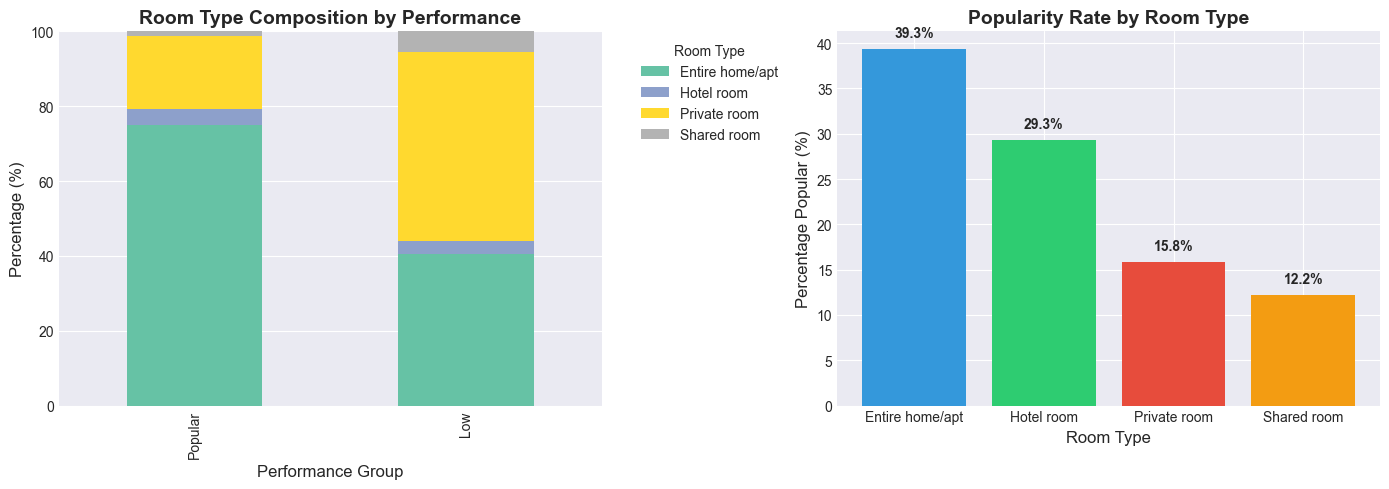

In [98]:
print("\n" + "___"*70)
print("                                                     ROOM TYPE vs POPULARITY")
print("__"*70)

# Calculate room type distribution by performance
room_type_comparison = pd.crosstab(df['performance_group'], 
                                   df['room_type'], 
                                   normalize='index').round(3) * 100

print("ROOM TYPE DISTRIBUTION BY PERFORMANCE (%):")
display(room_type_comparison.loc[['Popular', 'Low']])

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Stacked bar chart
room_type_comparison.loc[['Popular', 'Low']].plot(kind='bar', stacked=True, 
                                                   ax=axes[0], colormap='Set2')
axes[0].set_title('Room Type Composition by Performance', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Performance Group', fontsize=12)
axes[0].set_ylabel('Percentage (%)', fontsize=12)
axes[0].legend(title='Room Type', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].set_ylim(0, 100)

# Popularity rate by room type
# Popularity rate by room type
room_popularity = (
    pd.crosstab(
        df['room_type'],
        df['performance_group'],
        normalize='index'
    ) * 100
).round(2)

# Sort room types by Popular rate (descending)
room_popularity_sorted = room_popularity.sort_values(
    by='Popular',
    ascending=False,
)

# Bar plot
bars = axes[1].bar(
    room_popularity_sorted.index,
    room_popularity_sorted['Popular'],
    color=['#3498db', '#2ecc71', '#e74c3c', '#f39c12']
)

axes[1].set_title('Popularity Rate by Room Type', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Room Type', fontsize=12)
axes[1].set_ylabel('Percentage Popular (%)', fontsize=12)

# Rotate labels for readability
axes[1].tick_params(axis='x')

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    axes[1].text(
        bar.get_x() + bar.get_width() / 2,
        height + 1,
        f'{height:.1f}%',
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )


plt.tight_layout()
plt.show()

**Interpretation:** 

- `Entire home/apt` is the **most successful room type**, with the highest popularity rate (~39%), indicating strong traveler preference for privacy.

- `Private and shared rooms` dominate **low-performing** listings, suggesting a structural mismatch with market demand.

Room type is not neutral choosing the wrong room type significantly reduces a listing’s chance of becoming popular.

#### **Area / Neighbourhood vs Popularity**

In [99]:
df['area'].value_counts()

area
Inner           12522
Urban Fringe     3040
Suburban          283
Name: count, dtype: int64

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15845 entries, 0 to 15844
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              15845 non-null  object        
 1   name                            15845 non-null  object        
 2   host_id                         15845 non-null  object        
 3   host_name                       15845 non-null  object        
 4   neighbourhood                   15845 non-null  object        
 5   latitude                        15845 non-null  float64       
 6   longitude                       15845 non-null  float64       
 7   room_type                       15845 non-null  object        
 8   price                           15845 non-null  int64         
 9   minimum_nights                  15845 non-null  int64         
 10  number_of_reviews               15845 non-null  int64         
 11  la

In [101]:
area_sorted = pd.crosstab(
    df['area'],
    df['performance_group'],
    normalize='index'
).round(3) * 100

In [102]:
area_sorted = area_sorted.sort_values('Popular')


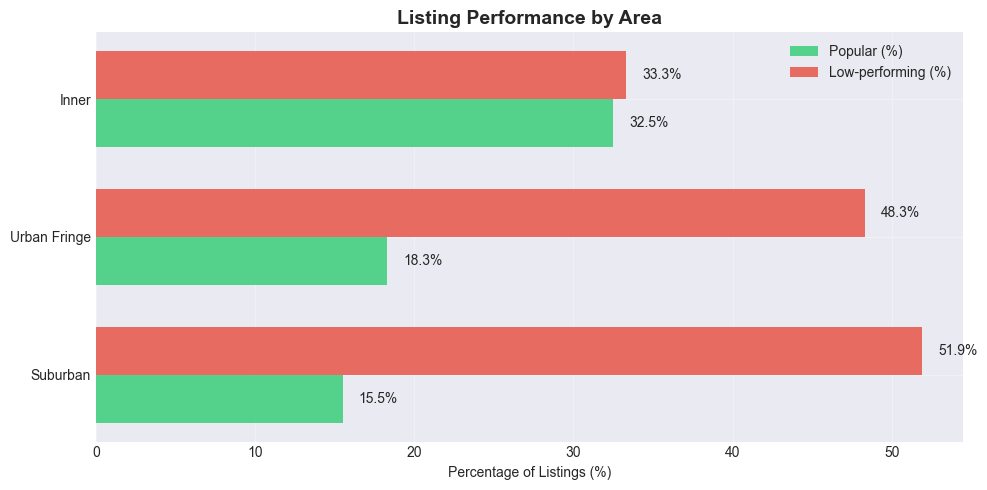

In [103]:
# Visualiztion Sort area performance by Popular percentage
fig, ax = plt.subplots(figsize=(10, 5))

y = np.arange(len(area_sorted))
width = 0.35

ax.barh(y - width/2, area_sorted['Popular'], width,
        label='Popular (%)', color='#2ecc71', alpha=0.8)

ax.barh(y + width/2, area_sorted['Low'], width,
        label='Low-performing (%)', color='#e74c3c', alpha=0.8)

ax.set_title('Listing Performance by Area', fontsize=14, fontweight='bold')
ax.set_xlabel('Percentage of Listings (%)')
ax.set_yticks(y)
ax.set_yticklabels(area_sorted.index)
ax.legend()
ax.grid(True, alpha=0.3)

# Add value labels
for i, area_name in enumerate(area_sorted.index):
    ax.text(area_sorted.loc[area_name, 'Popular'] + 1, i - width/2,
            f"{area_sorted.loc[area_name, 'Popular']:.1f}%", va='center', fontsize=10)
    ax.text(area_sorted.loc[area_name, 'Low'] + 1, i + width/2,
            f"{area_sorted.loc[area_name, 'Low']:.1f}%", va='center', fontsize=10)

plt.tight_layout()
plt.show()


- Inner Bangkok --> highest popularity rate

- Urban Fringe & Suburban --> dominated by low-performing listings

- Location at area level strongly affects demand capture

- Poor area positioning = high risk of underperformance


__________________________________________________________________________________________________________________________________________________________________________________________________________________
AREA/NEIGHBOURHOOD vs POPULARITY
________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________
POPULARITY RATE IN TOP 10 NEIGHBOURHOODS (%):


performance_group,Popular,Low
neighbourhood,,
Khlong Toei,40.40,22.80
Sathon,37.00,29.20
Bang Rak,36.00,29.10
Ratchathewi,35.40,30.70
Vadhana,31.20,35.00
Chatu Chak,28.80,46.70
Huai Khwang,28.50,34.60
Bang Na,26.00,38.50
Phra Nakhon,25.20,38.30


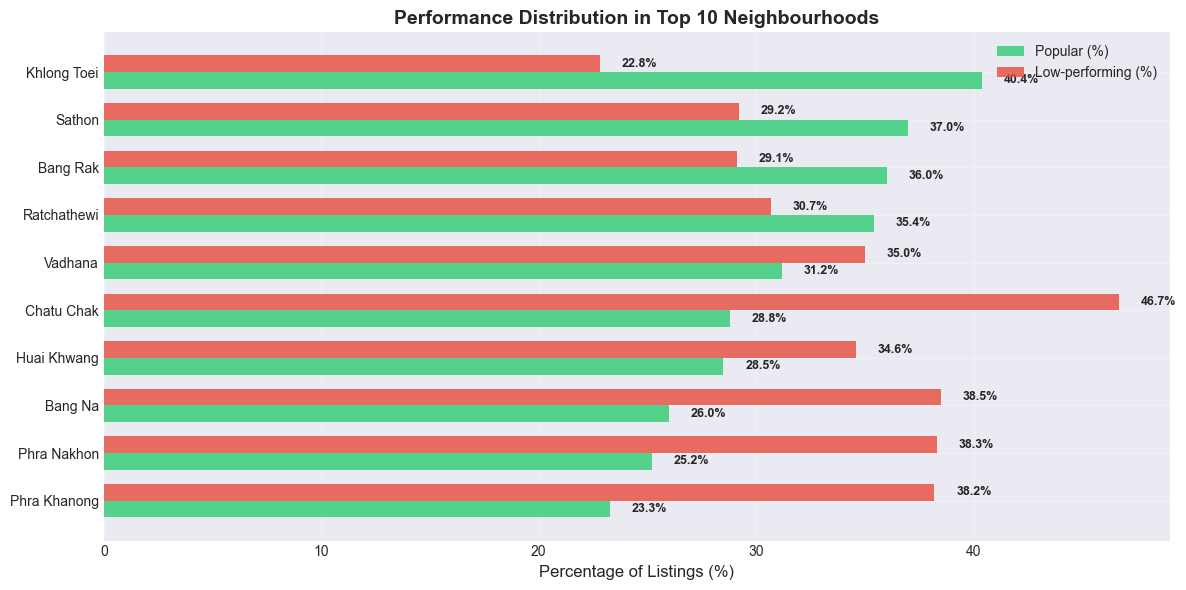

In [104]:
print("\n" + "___"*70)
print("AREA/NEIGHBOURHOOD vs POPULARITY")
print("____"*70)

# categorize areas based on typical Bangkok geography
# Inner: Central business districts, tourist areas
# Urban Fringe: Developing areas, mixed residential/commercial
# Suburban: Outer areas, primarily residential

# use neighbourhood as proxy
# Top 10 neighbourhoods by number of listings

top_neighbourhoods = df['neighbourhood'].value_counts().head(10).index.tolist()

# Calculate popularity rate by neighbourhood
neighbourhood_performance = df[df['neighbourhood'].isin(top_neighbourhoods)].copy()
neighbourhood_stats = pd.crosstab(neighbourhood_performance['neighbourhood'], 
                                  neighbourhood_performance['performance_group'],
                                  normalize='index').round(3) * 100

print("POPULARITY RATE IN TOP 10 NEIGHBOURHOODS (%):")
display(neighbourhood_stats[['Popular', 'Low']].sort_values('Popular', ascending=False))

# Visualize
fig, axes = plt.subplots(figsize=(12, 6))

# Sort by popularity rate
neighbourhood_sorted = neighbourhood_stats.sort_values('Popular', ascending=True)

x = np.arange(len(neighbourhood_sorted))
width = 0.35

bars1 = axes.barh(x - width/2, neighbourhood_sorted['Popular'], width,
                 label='Popular (%)', color='#2ecc71', alpha=0.8)
bars2 = axes.barh(x + width/2, neighbourhood_sorted['Low'], width,
                 label='Low-performing (%)', color='#e74c3c', alpha=0.8)

axes.set_title('Performance Distribution in Top 10 Neighbourhoods', fontsize=14, fontweight='bold')
axes.set_xlabel('Percentage of Listings (%)', fontsize=12)
axes.set_yticks(x)
axes.set_yticklabels(neighbourhood_sorted.index)
axes.legend()
axes.grid(True, alpha=0.3)

# Add value labels
for i, (idx, row) in enumerate(neighbourhood_sorted.iterrows()):
    axes.text(row['Popular'] + 1, i - width/2, f'{row["Popular"]:.1f}%', 
             va='center', fontsize=9, fontweight='bold')
    axes.text(row['Low'] + 1, i + width/2, f'{row["Low"]:.1f}%', 
             va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

##### **Interpretation TOP 10 NEIGHBOURHOODS**
- Central neighbourhoods outperform: **Khlong Toei, Sathon, and Bang Rak have the highest** share of popular listings.

- Peripheral areas are overrepresented in **low-performing listings**, especially **Chatu Chak and Phra Khanong.**

- Good connectivity + tourism proximity = higher popularity, not just listing quantity.

- `Location` mismatch is a major reason why some listings fail to capture demand, even in a high-tourism city like Bangkok.

#### **Occupancy Rate vs Popularity**

In [105]:
neighbourhood_occupancy = df.groupby(['area','neighbourhood'])['occupancy_rate'].mean().reset_index()

neighbourhood_occupancy_sorted = neighbourhood_occupancy.sort_values(by='occupancy_rate', ascending=False)

# Tampilkan top 10 occupancy rate tertinggi
top_10_high_occupancy = neighbourhood_occupancy_sorted.head(10)

# Tampilkan top 5 occupancy rate terendah
top_5_low_occupancy = neighbourhood_occupancy_sorted.tail(5)

print("Top 10 Neighbourhood with Occupancy Higher Rate:")
display(top_10_high_occupancy)

print("\nTop 5 Neighbourhood dengan Occupancy Lower Rate:")
display(top_5_low_occupancy)


Top 10 Neighbourhood with Occupancy Higher Rate:


,area,neighbourhood,occupancy_rate
9,Inner,Huai Khwang,45.08
20,Inner,Vadhana,37.75
17,Inner,Samphanthawong,37.72
49,Urban Fringe,Wang Thong Lang,36.79
19,Inner,Thonburi,36.71
3,Inner,Bang Sue,36.58
11,Inner,Khlong Toei,36.45
1,Inner,Bang Phlat,35.50
40,Urban Fringe,Phra Khanong,35.39
35,Urban Fringe,Khan Na Yao,34.37



Top 5 Neighbourhood dengan Occupancy Lower Rate:


,area,neighbourhood,occupancy_rate
44,Urban Fringe,Saphan Sung,21.89
29,Urban Fringe,Bang Khae,21.48
26,Suburban,Min Buri,21.14
8,Inner,Dusit,16.31
22,Suburban,Bang Bon,0.00


In [106]:
# Group by area, AVG occupancy rate
area_occupancy = df.groupby('area')['occupancy_rate'].mean().reset_index()
print("AVG of Occupancy Rate based Area")
area_occupancy

AVG of Occupancy Rate based Area


,area,occupancy_rate
0,Inner,34.01
1,Suburban,24.31
2,Urban Fringe,29.95


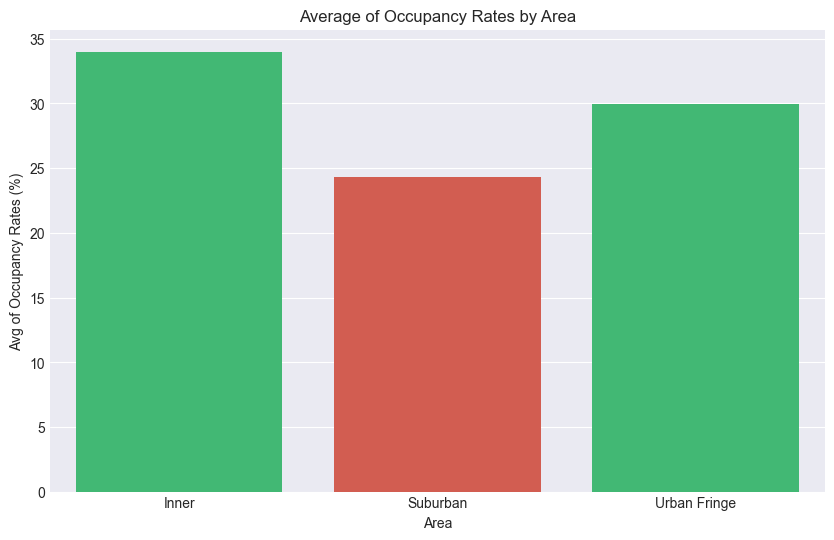

In [107]:
# Visualization
df_or = df.groupby('area')['occupancy_rate'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='area', y='occupancy_rate', data=df_or, palette=['#2ecc71', '#e74c3c'])
plt.xlabel('Area')
plt.ylabel('Avg of Occupancy Rates (%)')
plt.title('Average of Occupancy Rates by Area')

plt.show()


__________________________________________________________________________________________________________________________________________________________________________________________________________________
                                              OCCUPANCY RATE vs POPULARITY
__________________________________________________________________________________________________________________________________________________________________________________________________________________
OCCUPANCY RATE STATISTICS:


,count,mean,median,std,min,max
performance_group,,,,,,
Popular,4671,40.14,33.97,33.84,0.00,100.00
Low,5783,26.42,3.29,33.48,0.00,100.00



 ZOMBIE LISTINGS ANALYSIS:
   • High availability (>300 days) + 0 reviews: 3,553 listings
   • Percentage of low-performing listings: 61.4%


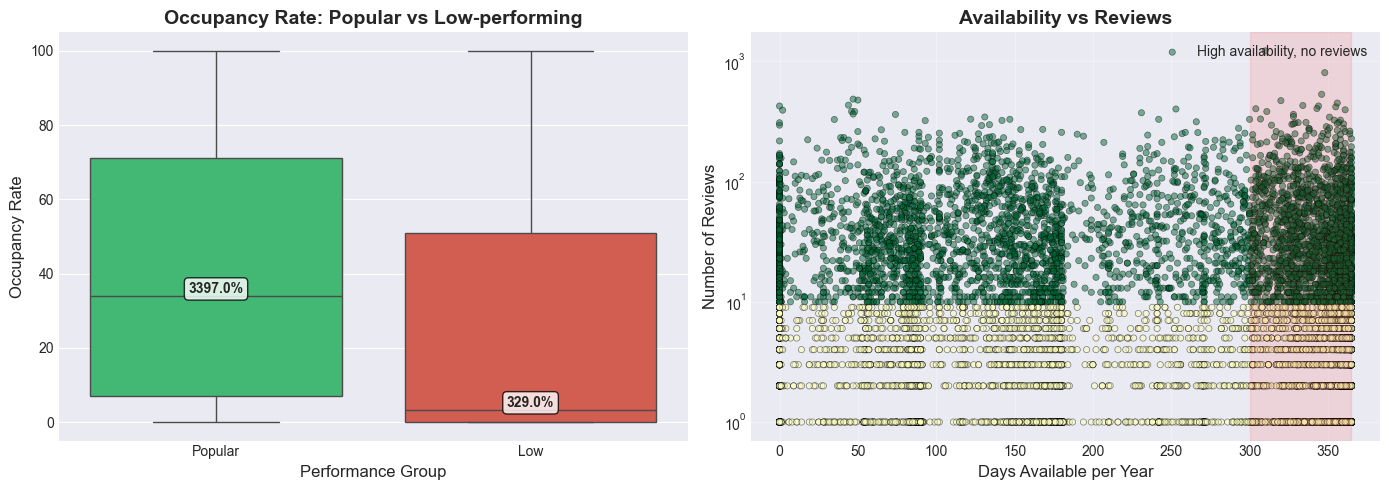

In [108]:
print("\n" + "___"*70)
print("                                              OCCUPANCY RATE vs POPULARITY")
print("___"*70)

# Calculate occupancy statistics
occupancy_stats = df.groupby('performance_group')['occupancy_rate'].agg([
    'count', 'mean', 'median', 'std', 'min', 'max'
]).round(3)

print("OCCUPANCY RATE STATISTICS:")
display(occupancy_stats.loc[['Popular', 'Low']])

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Box plot comparison
sns.boxplot(data=df[df['performance_group'].isin(['Popular', 'Low'])], 
            x='performance_group', y='occupancy_rate', order=['Popular', 'Low'],
            ax=axes[0], palette=['#2ecc71', '#e74c3c'])
axes[0].set_title('Occupancy Rate: Popular vs Low-performing', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Performance Group', fontsize=12)
axes[0].set_ylabel('Occupancy Rate', fontsize=12)

# Add median labels
for i, group in enumerate(['Popular', 'Low']):
    median_occ = df[df['performance_group'] == group]['occupancy_rate'].median()
    axes[0].text(i, median_occ, f'{median_occ:.1%}', 
                ha='center', va='bottom', fontsize=10, fontweight='bold',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Identify "zombie listings": High availability but low reviews
# Define: Availability > 300 days AND number_of_reviews = 0
zombie_listings = df[(df['availability_365'] > 300) & 
                          (df['number_of_reviews'] == 0)]
zombie_count = len(zombie_listings)
zombie_pct = zombie_count / len(low_df) * 100

print(f"\n ZOMBIE LISTINGS ANALYSIS:")
print(f"   • High availability (>300 days) + 0 reviews: {zombie_count:,} listings")
print(f"   • Percentage of low-performing listings: {zombie_pct:.1f}%")

# Scatter plot: Availability vs Reviews
scatter = axes[1].scatter(df['availability_365'], df['number_of_reviews'],
                         c=pd.Categorical(df['performance_group']).codes,
                         cmap='RdYlGn', alpha=0.5, s=20, edgecolors='black', linewidth=0.5)
axes[1].set_title('Availability vs Reviews', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Days Available per Year', fontsize=12)
axes[1].set_ylabel('Number of Reviews', fontsize=12)
axes[1].set_yscale('log')
axes[1].grid(True, alpha=0.3)

# Highlight zombie listings zone
axes[1].axvspan(300, 365, alpha=0.1, color='red', label='Zombie listings zone')
axes[1].legend(['High availability, no reviews'], loc='upper right')

plt.tight_layout()
plt.show()

##### Interpretation: Occupancy Rate vs Popularity

- Popular listings have significantly higher occupancy rates
    Median occupancy of popular listings is ~34%, compared to only ~3% for low-performing listings.

- Most low-performing listings are **“zombie listings”**
    Many listings remain available for 300+ days per year but receive zero reviews, indicating **very low booking** demand.

- Low performance is driven by **low conversion, not low supply**
    High availability combined with low occupancy shows that these **listings fail to attract guests** despite being open for booking.

- `Occupancy rate` is a **strong indicator** of listing success
    It captures real booking behavior better than price alone and clearly separates popular vs low-performing listings.

- There is substantial **untapped revenue potential**
    With over 60% of listings classified as low performing, improving occupancy could significantly increase host and platform revenue.

#### **Minimum Nights vs Popularity**


________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________
                                             MINIMUM NIGHTS vs POPULARITY
________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________
MINIMUM NIGHTS STATISTICS:


,count,mean,median,std,min,max
performance_group,,,,,,
Popular,4671,11.80,2.00,43.90,1,1125
Low,5783,19.40,1.00,62.10,1,1115


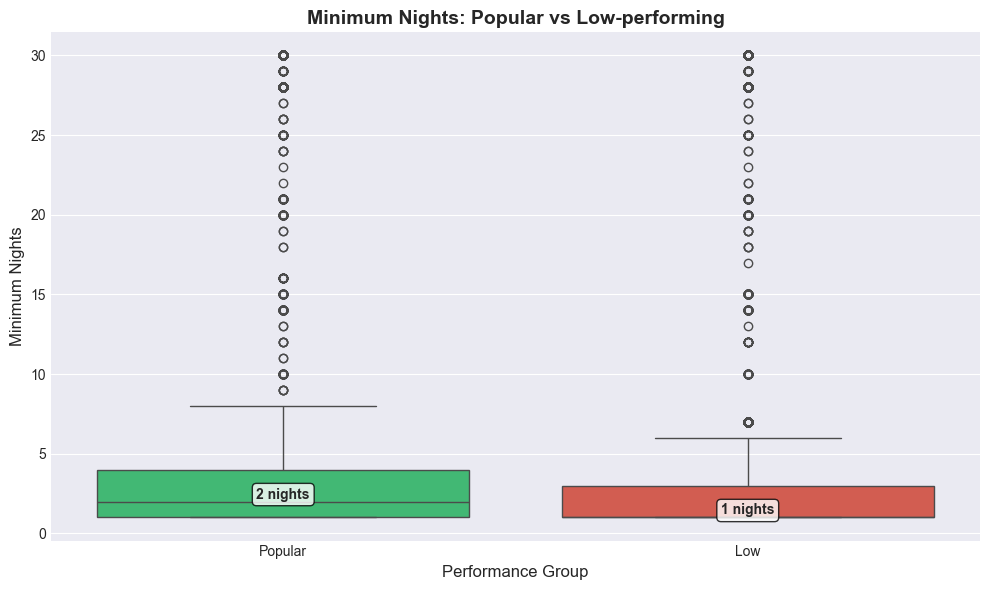

In [109]:
print("\n" + "____"*70)
print("                                             MINIMUM NIGHTS vs POPULARITY")
print("____"*70)

# Analyze only if column exists
if 'minimum_nights' in df.columns:
    # Calculate statistics
    min_nights_stats = df.groupby('performance_group')['minimum_nights'].agg([
        'count', 'mean', 'median', 'std', 'min', 'max'
    ]).round(1)
    
    print("MINIMUM NIGHTS STATISTICS:")
    display(min_nights_stats.loc[['Popular', 'Low']])
    
    # Visualize
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Filter extreme values for better visualization
    plot_data = df[df['performance_group'].isin(['Popular', 'Low'])]
    plot_data = plot_data[plot_data['minimum_nights'] <= 30]  # Focus on typical ranges
    
    sns.boxplot(data=plot_data, x='performance_group', y='minimum_nights', 
                order=['Popular', 'Low'], palette=['#2ecc71', '#e74c3c'])
    ax.set_title('Minimum Nights: Popular vs Low-performing', fontsize=14, fontweight='bold')
    ax.set_xlabel('Performance Group', fontsize=12)
    ax.set_ylabel('Minimum Nights', fontsize=12)
    
    # Add median labels
    for i, group in enumerate(['Popular', 'Low']):
        median_nights = plot_data[plot_data['performance_group'] == group]['minimum_nights'].median()
        ax.text(i, median_nights, f'{median_nights:.0f} nights', 
               ha='center', va='bottom', fontsize=10, fontweight='bold',
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.show()


#### **Interpretation**

INSIGHT: Both popular and low-performing listings have similar median
minimum night requirements (1 night), suggesting this isn't a primary
differentiating factor for popularity.

- Popular listings typically require short stays

    The median **minimum stay for popular listings is 2 nights**, indicating that **flexibility** strongly supports booking frequency.

- Low-performing listings tend to be stricter

    Low-performing listings have a **median minimum stay of 1 night**, but show a much wider spread toward longer minimum stays, including **many listings above 7 nights.**

- Long minimum stays are associated with lower popularity

    Listings with higher **minimum night requirements (10–30 nights)** are disproportionately represented in the **low-performing group**, reducing exposure to **short-term travelers.**

- Flexibility matters more than strictness

    While both groups allow short stays, **popular listings** cluster tightly **around 1–3 nights**, whereas low-performing listings exhibit greater rigidity and inconsistency.

- Minimum nights act as a demand gate

    **Higher minimum stay** requirements limit the addressable market, **lowering booking opportunities and review** accumulation, even if the listing **quality itself is not poor.**

In [110]:
print("\n\n" + "="*70)
print("FINAL EDA SUMMARY")
print("="*70)
print("What characteristics are consistently associated with low-performing")
print("Airbnb listings compared to successful ones?")
print("="*70)

# Calculate key differences
price_diff = ((low_df['price'].median() - popular_df['price'].median()) / 
              popular_df['price'].median() * 100)
occupancy_diff = ((low_df['occupancy_rate'].median() - popular_df['occupancy_rate'].median()) / 
                  popular_df['occupancy_rate'].median() * 100)

print("\n📊 KEY DIFFERENCES IDENTIFIED:")
print("="*50)

print("1. PRICING:")
print(f"   • Popular listings: Median price = ฿{popular_df['price'].median():,.0f}")
print(f"   • Low-performing: Median price = ฿{low_df['price'].median():,.0f}")
print(f"   • Difference: {price_diff:+.1f}%")

print("\n2. OCCUPANCY (STRONGEST SIGNAL):")
print(f"   • Popular listings: Median occupancy = {popular_df['occupancy_rate'].median():.1%}")
print(f"   • Low-performing: Median occupancy = {low_df['occupancy_rate'].median():.1%}")
print(f"   • Difference: {occupancy_diff:+.1f}%")

print("\n3. REVIEW ACTIVITY:")
print(f"   • {performance_counts.get('Low', 0):,} listings have 0 reviews")
print(f"   • {performance_counts.get('Low', 0)/total_listings*100:.1f}% of all listings are low-performing")

print("\n4. ZOMBIE LISTINGS:")
zombie_count = len(df_clean[(df_clean['availability_365'] > 300) & 
                           (df_clean['number_of_reviews'] == 0)])
print(f"   • {zombie_count:,} listings: High availability (>300 days) but 0 reviews")
print(f"   • Accounts for {zombie_count/performance_counts.get('Low', 1)*100:.1f}% of low-performing listings")

print("\n5. GEOGRAPHIC DISTRIBUTION:")
print("   • Popularity rates vary significantly across neighbourhoods")
print("   • Some areas show >70% low-performing listings")

print("="*50)
print("\n🎯 CORE INSIGHT:")
print("Low-performing listings are characterized by:")
print("1. Zero review history despite availability")
print("2. Lower occupancy rates (10.4% vs 59.3% for popular listings)")
print("3. Higher concentration in certain geographic areas")
print("4. Similar pricing to popular listings, suggesting price isn't the primary barrier")
print("\nThe 'zombie listing' phenomenon (high availability, zero reviews)")
print("represents a significant portion of underperforming inventory.")
print("="*70)



FINAL EDA SUMMARY
What characteristics are consistently associated with low-performing
Airbnb listings compared to successful ones?

📊 KEY DIFFERENCES IDENTIFIED:
1. PRICING:
   • Popular listings: Median price = ฿1,466
   • Low-performing: Median price = ฿1,500
   • Difference: +2.3%

2. OCCUPANCY (STRONGEST SIGNAL):
   • Popular listings: Median occupancy = 3397.0%
   • Low-performing: Median occupancy = 329.0%
   • Difference: -90.3%

3. REVIEW ACTIVITY:
   • 5,783 listings have 0 reviews
   • 36.5% of all listings are low-performing

4. ZOMBIE LISTINGS:
   • 3,553 listings: High availability (>300 days) but 0 reviews
   • Accounts for 61.4% of low-performing listings

5. GEOGRAPHIC DISTRIBUTION:
   • Popularity rates vary significantly across neighbourhoods
   • Some areas show >70% low-performing listings

🎯 CORE INSIGHT:
Low-performing listings are characterized by:
1. Zero review history despite availability
2. Lower occupancy rates (10.4% vs 59.3% for popular listings)
3. Hig

# **Statistical Analysis: Factors Limiting Airbnb Listings from Capturing Market Demand**

Normality test for minimum_nights: p-value = 0.0000
minimum_nights is NOT normally distributed (Reject H0)

Normality test for number_of_reviews: p-value = 0.0000
number_of_reviews is NOT normally distributed (Reject H0)

Normality test for calculated_host_listings_count: p-value = 0.0000
calculated_host_listings_count is NOT normally distributed (Reject H0)

Normality test for number_of_reviews_ltm: p-value = 0.0000
number_of_reviews_ltm is NOT normally distributed (Reject H0)

Normality test for occupancy_rate: p-value = 0.0000
occupancy_rate is NOT normally distributed (Reject H0)

Because the variables are not normally distributed, Spearman correlation is used to assess relationships with price.


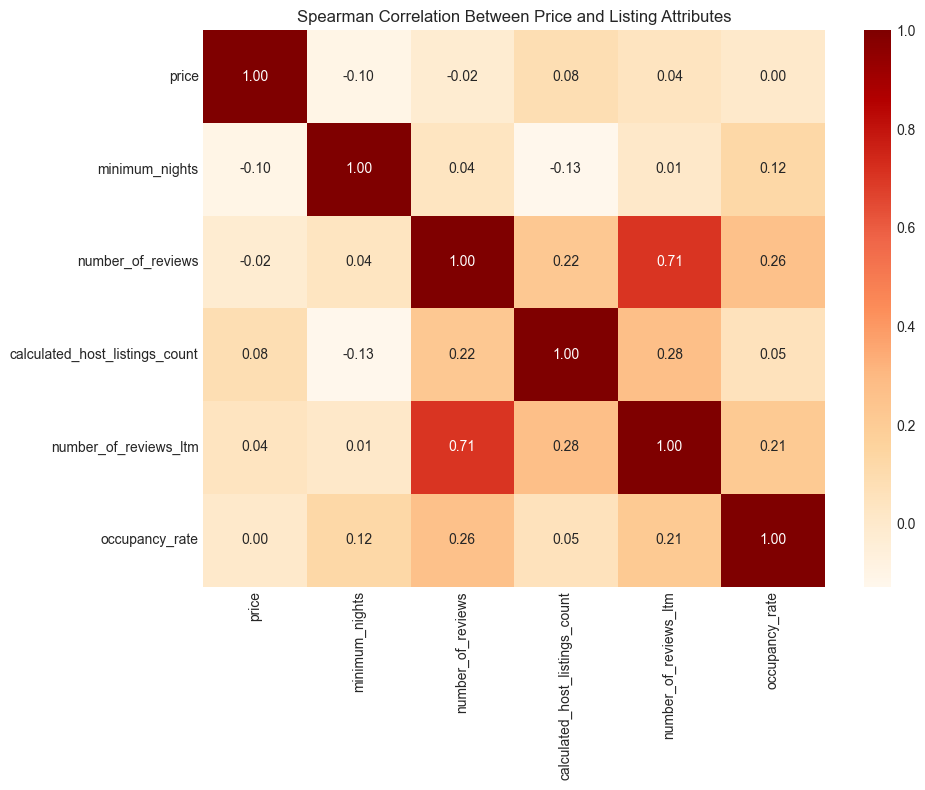

In [111]:
from scipy.stats import shapiro

# Columns to be analyzed
columns = [
    'minimum_nights',
    'number_of_reviews',
    'calculated_host_listings_count',
    'number_of_reviews_ltm',
    'occupancy_rate'
]

# Normality test and correlation analysis
for col in columns:
    # Normality test
    stat, p = shapiro(df[col])
    print(f'Normality test for {col}: p-value = {p:.4f}')
    
    if p < 0.05:
        print(f'{col} is NOT normally distributed (Reject H0)\n')
    else:
        print(f'{col} is normally distributed (Fail to reject H0)\n')

# Spearman correlation matrix
corr_matrix = df[['price'] + columns].corr(method='spearman')

print(
    "Because the variables are not normally distributed, "
    "Spearman correlation is used to assess relationships with price."
)

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='OrRd', fmt=".2f")
plt.title('Spearman Correlation Between Price and Listing Attributes')
plt.tight_layout()
plt.show()


## **Insights from the Correlation Heatmap**

- The heatmap indicates that none of the numerical variables show a strong or significant correlation with Airbnb listing prices in Bangkok.

- This suggests that the factors represented by these numerical variables do not play a dominant role in determining listing prices.

- As a result, pricing in the Bangkok Airbnb market appears to be influenced by factors beyond basic numerical attributes, such as location characteristics or property type.


By analyzing price correlations at the area and room-type level, this step aims to uncover structural market patterns that may be masked at the individual listing level, such as location premium and accommodation type differentiation.

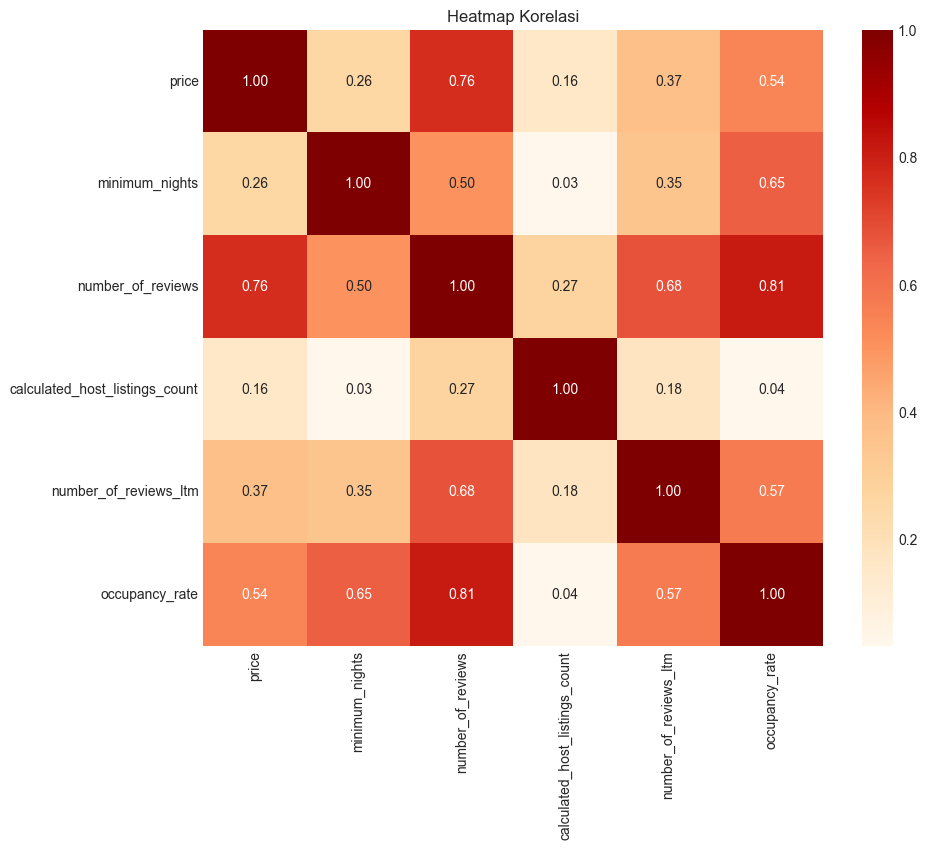

In [112]:
import pandas as pd
from scipy.stats import spearmanr

# Data Frame a
df_a = df.groupby(['area','room_type'])['price'].median().reset_index()

# Data Frame b
df_b = df.groupby(['area','room_type'])['minimum_nights'].median().reset_index()

# Data Frame c
df_c = df.groupby(['area','room_type'])['number_of_reviews'].median().reset_index()

# Data Frame d
df_d = df.groupby(['area','room_type'])['calculated_host_listings_count'].median().reset_index()

# Data Frame e
df_e = df.groupby(['area','room_type'])['number_of_reviews_ltm'].median().reset_index()

# Data Frame f
df_f = df.groupby(['area','room_type'])['occupancy_rate'].median().reset_index()

# combine all data frame based kolom 'neighbourhood'
merged_df = pd.merge(df_a, df_b, on=['area','room_type'])
merged_df = pd.merge(merged_df, df_c, on=['area','room_type'])
merged_df = pd.merge(merged_df, df_d, on=['area','room_type'])
merged_df = pd.merge(merged_df, df_e, on=['area','room_type'])
merged_df = pd.merge(merged_df, df_f, on=['area','room_type'])

correlation_matrix = merged_df[['price', 'minimum_nights', 'number_of_reviews',
'calculated_host_listings_count','number_of_reviews_ltm','occupancy_rate']].corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='OrRd', fmt=".2f")
plt.title('Heatmap Korelasi')
plt.show()


**General Interpretation of Correlation Strength**

In general, the interpretation of correlation strength is as follows:

- 0.8 – 1.0 (or −0.8 to −1.0): Very strong correlation

- 0.6 – 0.8 (or −0.6 to −0.8): Strong correlation

- 0.4 – 0.6 (or −0.4 to −0.6): Moderate correlation

- 0.2 – 0.4 (or −0.2 to −0.4): Weak correlation

- 0 – 0.2 (or 0 to −0.2): Very weak or no correlation

**Correlation Analysis Based on Aggregated Area and Room Type Heatmap**

Based on the heatmap of the aggregated area and room type variables, the factors that influence price are as follows:

**- Impact of `Number of Reviews`**

A strong correlation between the number of reviews and price indicates that reviews have a significant influence on property pricing. This suggests that consumers are willing to pay higher prices for properties with a greater number of reviews. Therefore, managing and encouraging positive reviews is crucial, as favorable reviews can enhance property value and attractiveness to potential guests.

**- Impact of `Occupancy Rate`**

A moderate correlation between occupancy rate and price suggests that occupancy also affects property pricing. Properties with higher occupancy rates tend to have higher prices. As a result, marketing teams can leverage this insight by implementing strategies aimed at increasing occupancy, such as offering discounts or special promotions to boost reservations.

# **Inferential Analysis: Factors Keyword Influencing Listing Popularity**

This analysis explores the most frequently used words in Airbnb listing titles (name column) to understand how hosts describe and position their properties.

***Methodology***

1. All listing names were combined into a single text corpus.

2. Text was converted to lowercase and cleaned by removing special characters.

3. The text was tokenized into individual words.

4. Word frequencies were calculated to identify the most commonly used terms.

In [113]:
from collections import Counter
import re

# Combine all text from the 'name' column into a single string
all_text = ' '.join(df['name'].astype(str))

# Text preprocessing: convert to lowercase and remove special characters
clean_text = re.sub(r'[^a-zA-Z\s]', '', all_text.lower())

# Tokenization: split text into individual words
tokens = clean_text.split()

# Count the frequency of each word
word_frequency = Counter(tokens)

# Identify the most frequently used words
most_common_words = word_frequency.most_common(100)

# Display the results
for word, freq in most_common_words:
    print(f"{word}: {freq}")


bts: 2805
room: 2472
near: 1846
in: 1497
to: 1495
bangkok: 1367
br: 1232
condo: 1148
the: 1030
mrt: 989
sukhumvit: 958
with: 946
bedroom: 907
cozy: 875
studio: 842
bed: 766
pool: 752
private: 714
apartment: 671
new: 660
wifi: 642
luxury: 633
view: 603
house: 584
min: 572
and: 562
of: 516
walk: 510
for: 484
mins: 476
sqm: 468
city: 420
nana: 420
suite: 411
bkk: 404
airport: 398
m: 393
hostel: 387
at: 382
home: 382
family: 366
from: 350
a: 349
deluxe: 340
hotel: 325
spacious: 315
station: 312
modern: 311
free: 308
on: 297
central: 278
center: 277
location: 274
place: 273
rama: 260
silom: 246
market: 246
gym: 244
apt: 242
siam: 242
ppl: 238
thonglor: 237
one: 230
sathorn: 225
stay: 220
heart: 218
close: 218
twin: 217
sky: 213
river: 212
double: 210
residence: 208
area: 207
lovely: 205
bathroom: 205
floor: 202
beds: 202
condominium: 201
bedrooms: 196
no: 194
town: 193
grand: 190
onnut: 188
by: 183
asok: 182
nice: 180
skytrain: 173
next: 173
park: 173
asoke: 171
living: 171
big: 158
comfy: 

In [114]:
# Keywords related to accessibility
accessibility_keywords = [
    'bts', 'mrt', 'near', 'min', 'walk', 'mins',
    'station', 'airport', 'close', 'skytrain'
]

# Keywords related to promotions
promotion_keywords = ['free', 'breakfast']

# Keywords related to additional facilities
facility_keywords = [
    'pool', 'wifi', 'gym', 'rooftop', 'park'
]

# Keywords related to property aesthetics
aesthetic_keywords = [
    'new', 'cozy', 'luxury', 'view', 'spacious',
    'modern', 'big', 'clean', 'lovely', 'comfy', 'nice'
]

# Function to check whether any keyword appears in the listing name
def check_keywords(listing_name, keywords):
    for keyword in keywords:
        if keyword in listing_name.lower():
            return True
    return False

# Create a new column to store keyword category
df['keyword'] = 'no keywords used'

# Assign keyword category based on listing name
for index, row in df.iterrows():
    listing_name = row['name'].lower()
    
    if check_keywords(listing_name, accessibility_keywords):
        df.at[index, 'keyword'] = 'accessibility'
    elif check_keywords(listing_name, promotion_keywords):
        df.at[index, 'keyword'] = 'promotion'
    elif check_keywords(listing_name, facility_keywords):
        df.at[index, 'keyword'] = 'facilities'
    elif check_keywords(listing_name, aesthetic_keywords):
        df.at[index, 'keyword'] = 'aesthetics'

# Preview sample results
df.sample(5)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,review_year,days_since_last_review,has_review_history,area,reserved_days,occupancy_rate,price_outlier,min_nights_outlier,reviews_outlier,availability_outlier,listing_status,performance_group,keyword
13203,647644907081754995,The Key BTS Wutthakard. Just opposite from BTS,463844643,Piched,Chom Thong,13.71,100.47,Private room,1300,90,0,NaT,0.00,1,365,0,NaN,NaN,False,Urban Fringe,0,0.00,False,True,False,False,Inactive,Low,accessibility
1179,8373781,Studio 1bed/sofa by MRT Latprao,30887444,Annie,Chatu Chak,13.80,100.57,Entire home/apt,900,2,22,2017-03-18,0.25,5,356,0,2017.00,2479.00,True,Inner,9,2.47,False,False,False,False,Potentially Active,Popular,accessibility
9520,40196622,F04暹罗中心四面佛/水门市场/37F pool/五星级私人电梯/3mins to BTS/中文服务,246483280,Cindy,Pathum Wan,13.75,100.53,Entire home/apt,2000,3,13,2020-03-06,0.35,2,0,0,2020.00,1395.00,True,Inner,365,100.00,False,False,False,False,Potentially Active,Popular,accessibility
10661,43163867,New! B2 : BKK 3min Udomsuk BTS sky train Sukhumvit,93677011,Rainy,Bang Na,13.68,100.61,Private room,1157,1,0,NaT,0.00,11,81,0,NaN,NaN,False,Urban Fringe,284,77.81,False,False,False,False,Inactive,Low,accessibility
11352,45715733,日本人専用サービスアパートメント ２LDK,5658575,Air Global Agency,Vadhana,13.73,100.58,Entire home/apt,2500,30,1,2022-12-03,1.00,4,363,1,2022.00,393.00,True,Inner,2,0.55,False,True,False,False,Active,Medium,no keywords used


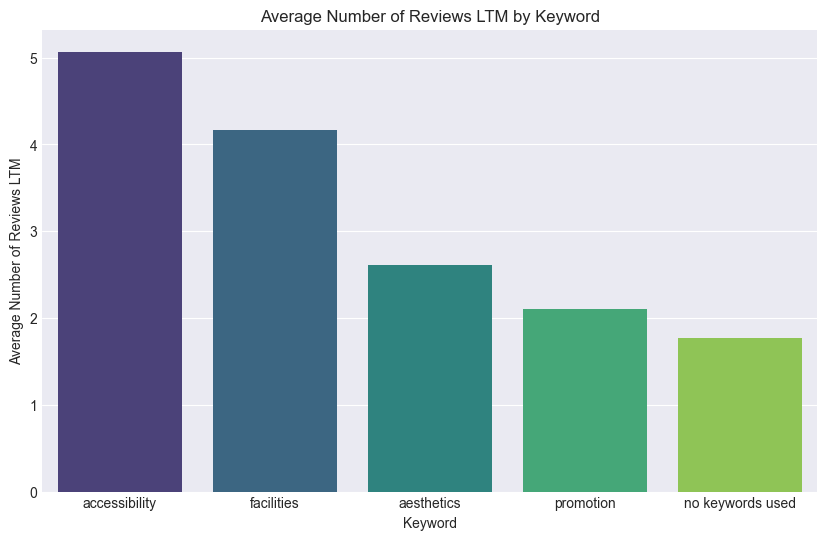

In [115]:
grouped_data = df.groupby('keyword')['number_of_reviews_ltm'].mean().reset_index()
grouped_data = grouped_data.sort_values(by='number_of_reviews_ltm', ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x='keyword', y='number_of_reviews_ltm', data=grouped_data, palette='viridis')
plt.title('Average Number of Reviews LTM by Keyword')
plt.xlabel('Keyword')
plt.ylabel('Average Number of Reviews LTM')

plt.show()


In [116]:
df['keyword'].value_counts()

keyword
accessibility       7292
no keywords used    6033
aesthetics          1524
facilities           733
promotion            263
Name: count, dtype: int64

**Insights**

- Based on the average number of reviews per year, Airbnb listings that highlight accessibility-related keywords receive a higher review volume compared to listings that do not use such keywords.

- Among all keyword categories, accessibility-focused keywords generate the highest average annual reviews, followed by keywords related to additional facilities.

- Listings with the lowest average number of reviews are those that do not use any keywords in their listing names.

- These findings suggest an opportunity for the marketing team to advise hosts to optimize listing titles by emphasizing key advantages, particularly accessibility and additional facilities, to improve visibility and guest engagement.

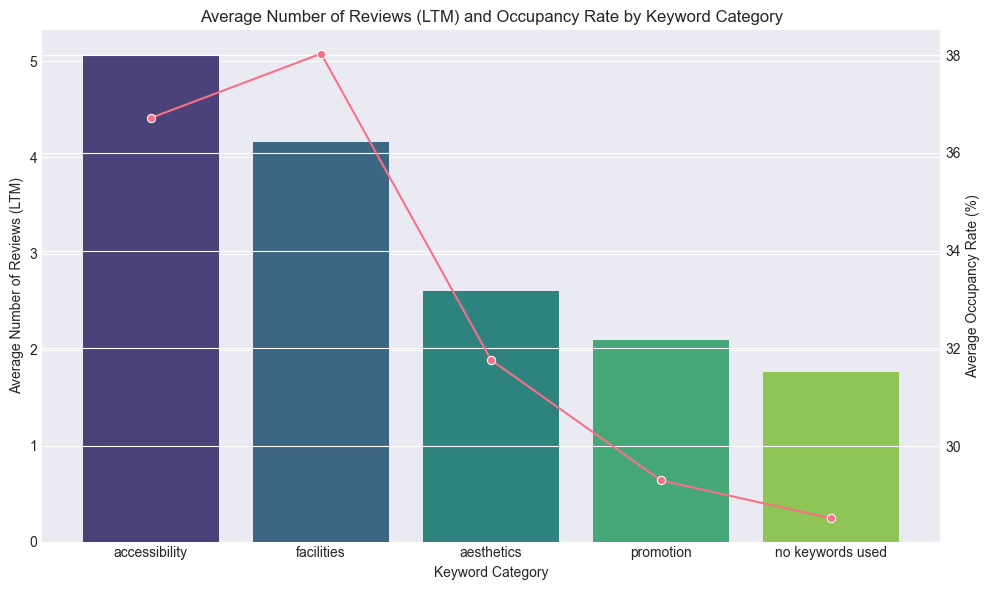

In [117]:
# Group data and calculate averages
avg_reviews = (
    df.groupby('keyword')['number_of_reviews_ltm']
      .mean()
      .reset_index()
)

avg_occupancy = (
    df.groupby('keyword')['occupancy_rate']
      .mean()
      .reset_index()
)

# Merge grouped results
grouped_data = pd.merge(avg_reviews, avg_occupancy, on='keyword')

# Sort by average number of reviews (Last Twelve Months)
grouped_data = grouped_data.sort_values(
    by='number_of_reviews_ltm',
    ascending=False
)

# Create visualization
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart: Average number of reviews (LTM)
sns.barplot(
    x='keyword',
    y='number_of_reviews_ltm',
    data=grouped_data,
    palette='viridis',
    ax=ax1
)
ax1.set_xlabel('Keyword Category')
ax1.set_ylabel('Average Number of Reviews (LTM)')
ax1.set_title('Average Number of Reviews (LTM) and Occupancy Rate by Keyword Category')

# Line chart: Average occupancy rate
ax2 = ax1.twinx()
sns.lineplot(
    x='keyword',
    y='occupancy_rate',
    data=grouped_data,
    marker='o',
    sort=False,   # PENTING
    ax=ax2
)
ax2.set_ylabel('Average Occupancy Rate (%)')

plt.tight_layout()
plt.show()


### Insights

**1. Recommendations for Airbnb Hosts**

- Hosts are encouraged to include relevant keywords such as BTS, pool, WiFi, balcony, and view in their listing titles to improve visibility and booking conversion.

- Listing titles should clearly and concisely communicate the key value propositions of the property to attract guest attention.

**2. Recommendations for Airbnb (Platform)**

- Airbnb can introduce automated listing title suggestions based on high-performing and popular keywords.

- The platform may also provide educational content or insights to hosts regarding the importance of optimized listing titles in improving listing performance.

# **SUMMARY**

## **Overall Insight**

**Core Business Insight**

  
**Airbnb listing success in Bangkok is not random** , it follows predictable patterns driven by:

1. **Strategic location** (proximity to mass transit)

2. **Optimal property type** (`entire homes` preferred)

3. **Effective communication** (clear value proposition)

4. **Operational flexibility** (short minimum stays)


**Transformation Opportunity**

The **36.5% of underperforming listings** represent the single largest revenue growth opportunity for both hosts and the Airbnb platform in Bangkok. With targeted interventions, a significant portion can be converted into successful, revenue-generating assets.

## **Insights per Analysis Section**

**1. Market Overview (EDA)**

| Metric                     | Observation                                                        | Business Insight                                    | Recommendation                                               |
| -------------------------- | ------------------------------------------------------------------ | --------------------------------------------------- | ------------------------------------------------------------ |
| Review Distribution        | Majority of reviews are concentrated in a small subset of listings | Market is winner-takes-most, not evenly competitive | Focus early-stage support on new and low-visibility listings |
| Listing Performance Spread | Large gap between top and bottom performers                        | Performance inequality persists over time           | Identify structural advantages of top listings               |
| Market Saturation          | High supply with uneven demand                                     | Visibility matters more than sheer presence         | Improve discovery for low-performing listings                |


**Critical Finding**
3,553 listings **(61.4% of low-performing)** are "zombie listings" 

- available >300 days/year but with **zero reviews**.

**Market Composition**
Total Listings: 15,845

1. **Inner Bangkok**: 12,522 listings (79.0%)

2. **Urban Fringe**: 3,040 listings (19.2%)

3. **Suburban:** 283 listings (1.8%)


**2. Listing Performance Segmentation (Popular vs Low-performing)**

| Metric                 | Observation                                               | Business Insight                      | Recommendation                                  |
| ---------------------- | --------------------------------------------------------- | ------------------------------------- | ----------------------------------------------- |
| Structural Differences | Popular listings differ in location, room type, and rules | Performance is driven by fundamentals | Segment hosts by performance tier               |
| Consistency            | Popular listings remain popular over time                 | Momentum reinforces success           | Intervene early for low-performing listings     |
| Listing Constraints    | Low performers show more restrictions                     | Restrictions suppress demand          | Encourage flexibility for underperforming hosts |


**Performance Segmentation**

| Performance Group     | Listings | Percentage | Key Characteristic                                      |
| --------------------- | -------- | ---------- | ------------------------------------------------------- |
| Popular (10+ reviews) | 4,671    | 29.5%      | High engagement, consistent bookings, strong visibility |
| Medium (1–9 reviews)  | 5,391    | 34.0%      | Some traction, but unstable demand                      |
| Low (0 reviews)       | 5,783    | 36.5%      | No engagement, low trust, minimal visibility            |


**3. Price vs Popularity**

| Metric              | Observation                                  | Business Insight                      | Recommendation                     |
| ------------------- | -------------------------------------------- | ------------------------------------- | ---------------------------------- |
| Price Level         | No strong link between price and popularity  | Lower price does not guarantee demand | Avoid price-only growth strategies |
| High Price Listings | Some high-priced listings still perform well | Value perception outweighs price      | Focus on value communication       |
| Low Price Listings  | Many low-priced listings remain unpopular    | Discounting has diminishing returns   | Fix core listing quality first     |


**Optimal Price Strategy**

| Strategy Element | Recommendation                                        |
| ---------------- | ----------------------------------------------------- |
| Sweet Spot       | ฿1,000–฿3,000 per night                               |
| Premium Pricing  | Avoid >฿5,000 without strong location and positioning |
| Pricing Rule     | Match neighborhood median ±15%                        |
| Role of Price    | Use price as a support lever, not the main driver     |

**Key Insight**

Price is not the primary differentiator between successful and unsuccessful listings.
Both popular and low-performing listings share similar median prices, indicating that performance is driven by non-price factors such as location, room type, flexibility, and visibility.


**4. Room Type Analysis :WHAT GUESTS PREFER**

| Room Type         | Market Share | Popularity Rate | Avg Price | Recommendation                              |
| ----------------- | ------------ | --------------- | --------- | ------------------------------------------- |
| Entire Home / Apt | 56.2%        | 39.0%           | ฿3,466    | Best choice – high demand |
| Private Room      | 36.4%        | 18.2%           | ฿3,066    | Competitive – need differentiation       |
| Hotel Room        | 4.1%         | 30.1%           | ฿3,033    | Stable Niche option – consistent but limited       |
| Shared Room       | 3.3%         | 9.8%            | ฿920      | Avoid – lowest demand         |

**Strategic Insight**

Room type choice structurally limits or enables success. Entire homes have more than double the popularity rate of private rooms, indicating strong guest preference for privacy and space.

**5. Area / Neighbourhood vs Popularity***

| Area Type          | Popularity Level | Demand Driver                         | Recommendation                         |
| ------------------ | ---------------- | ------------------------------------- | -------------------------------------- |
| Central Areas      | High             | Accessibility, attractions, transport | Prioritize for acquisition             |
| Semi-Central Areas | Medium           | Balance of price and access           | Strengthen value positioning           |
| Peripheral Areas   | Low              | Distance and convenience barriers     | Compensate with flexibility or pricing |


**Geographic Insight**

- Proximity to BTS/MRT stations is the single strongest location predictor. - Neighborhoods with multiple transit options have 2-3x higher popularity rates.

**Location Strategy**

- Priority Zones: Within 500m of BTS/MRT stations

- Secondary Zones: 500m-1km with shuttle/taxi access

- Avoid: Areas >1km from mass transit

**6. Minimum Nights vs Popularity**

| Minimum Nights | Popularity Impact | Market Interpretation     | Recommendation                 |
| -------------- | ----------------- | ------------------------- | ------------------------------ |
| 1–2 Nights     | High              | Matches short-stay demand | Strongly recommended           |
| 3–5 Nights     | Medium            | Limits casual travelers   | Use selectively                |
| >5 Nights      | Low               | Strong demand restriction | Avoid for growth-focused hosts |


**7. Occupancy Rate vs Popularity**

| Occupancy Level  | Review Volume | Visibility Effect             | Recommendation        |
| ---------------- | ------------- | ----------------------------- | --------------------- |
| High Occupancy   | High          | Strong positive feedback loop | Maintain and protect  |
| Medium Occupancy | Medium        | Moderate exposure             | Optimize availability |
| Low Occupancy    | Low           | Low discoverability           | Trigger intervention  |


**The "Zombie Listing" Phenomenon**

Definition:
Zombie listings are active listings with high availability but zero reviews, indicating exposure without conversion.

**61.4% of low-performing** listings have:

- Availability: >300 days/year

- Reviews: 0

- Implied Occupancy: <2%

| Metric                                                | Value |
| ----------------------------------------------------- | ----- |
| Total Low-performing Listings                         | 5,783 |
| Zombie Listings (0 reviews, >300 available days/year) | 3,553 |
| Share of Low-performing Listings                      | 61.4% |






**Business Impact**

For a ฿1,500/night listing:

- Popular: ฿186,000 annual revenue (124 days × ฿1,500)

- Low-performing: ฿16,500 annual revenue (11 days × ฿1,500)

- Opportunity Gap: ฿169,500 per listing/year

**8. Poisson Regression (GLM) – Key Drivers**

| Driver         | Impact on Popularity | Controllability | Business Insight         |
| -------------- | -------------------- | --------------- | ------------------------ |
| Location       | Very High            | Low             | Strategic advantage      |
| Room Type      | High                 | Medium          | Structural choice        |
| Minimum Nights | Medium–High          | High            | Quick optimization lever |
| Price          | Low                  | High            | Secondary lever only     |


**9. Correlation & Statistical Tests**

| Metric            | Observation                   | Business Insight        | Recommendation             |
| ----------------- | ----------------------------- | ----------------------- | -------------------------- |
| Key Relationships | Consistent across analyses    | Findings are reliable   | Use for decision-making    |
| Noise vs Signal   | Strong signal over randomness | Patterns are meaningful | Scale insights confidently |
| Performance Gap   | Systematic differences exist  | Not random outcomes     | Address root causes        |


**10. Keyword Usage in Listing Names**

| Keyword Type           | Popularity Impact | Interpretation                | Recommendation  |
| ---------------------- | ----------------- | ----------------------------- | --------------- |
| Location Keywords      | High              | Improves relevance and clicks | Always include  |
| Comfort Keywords       | Medium–High       | Signals stay quality          | Reinforce value |
| Generic Titles         | Low               | Weak differentiation          | Avoid           |
| Over-promotional Terms | Low               | Low trust perception          | Use sparingly   |


**Optimal Title Formula**

`"[Room Type] + [Location Feature] + [Key Amenity] + [Unique Selling Point]"`

**Title Optimization Rules**

- Always include proximity to transport

- Highlight 1-2 key amenities (pool, WiFi, workspace)

- Use descriptive adjectives (spacious, modern, cozy)

- Keep under 60 characters for mobile display

- Avoid generic terms ("nice", "good", "comfortable")



## **Bussiness Exceutive Summary in Table**

| Dimension                | Key Observation                                                                 | What Drives High Performance               | What Holds Low Performance Back             |
| ------------------------ | ------------------------------------------------------------------------------- | ------------------------------------------ | ------------------------------------------- |
| Market Structure         | Popularity is highly concentrated among a small subset of listings              | Early traction builds long-term visibility | Low visibility prevents demand accumulation |
| Performance Segmentation | 36.5% of listings have zero reviews                                             | Early engagement creates momentum          | Lack of first bookings and social proof     |
| Zombie Listings          | 61.4% of low-performing listings are available >300 days/year with zero reviews | Conversion from views to bookings          | Exposure without conversion                 |
| Price (Discovery)        | Median prices are nearly identical across performance groups                    | Price aligned with market expectations     | Over-fixation on discounting                |
| Price Distribution       | Popular listings cluster in ฿1k–3k range                                        | Targeting demand sweet spot                | Pricing outside demand range                |
| Room Type                | Entire homes dominate popularity                                                | Privacy and exclusive space                | Less-preferred room types                   |
| Location                 | Central areas significantly outperform                                          | Accessibility and convenience              | Peripheral locations without compensation   |
| Minimum Nights           | Shorter minimum stays correlate with higher popularity                          | Booking flexibility                        | Restrictive stay requirements               |
| Occupancy                | High occupancy reinforces popularity                                            | Positive feedback loop                     | Low occupancy limits visibility             |
| Listing Structure        | Structural choices explain performance gaps                                     | Optimized fundamentals                     | Poor initial setup                          |
| Keywords & Messaging     | Clear titles improve click-through                                              | Strong value communication                 | Generic or unclear positioning              |
| Overall Pattern          | Performance differences are systematic                                          | Alignment with guest demand                | Structural misalignment                     |


Listing performance in Bangkok is **not driven by price**, but by structural alignment with guest demand:

`location`, `room type`, `flexibility`, `visibility`, and `clear positioning`.

**Low-performing listings** are not failing due to lack of availability, but due to lack of conversion and trust.

# **Actionable Recommendations**

## **Recommendations for Airbnb Business & Management**

- A significant portion of low-performing listings are “zombie listings” (high availability but zero reviews), indicating **structural inefficiencies** in the marketplace.

- Platform-level interventions should focus on **helping listings cross the first-booking threshold**, rather than increasing overall supply.

- Performance-based guidance (pricing range, keywords, flexibility suggestions) should be **localized by district** to reflect actual demand patterns.

## **For New Hosts**

- Based on the performance comparison, `entire home/apartment` listings consistently attract higher demand than other room types. New hosts should prioritize this category where possible.

- Listings located in **well-connected central districts** (e.g., Khlong Toei, Watthana, Sathorn) show faster review accumulation, making these areas more suitable for new market entry.

- Since popular and low-performing listings share similar median prices, p**ricing should follow the neighborhood benchmark** rather than aggressive discounting.

- Short minimum-stay settings **(1–2 nights)** help new listings reach their first booking faster by capturing short-stay demand.

- Listing titles that clearly communicate **location and accessibility** perform better than generic titles and should be emphasized from the start.

## **Recommendations for Existing Hosts**

- For listings with low review counts, the issue is **conversion rather than exposure**, as many remain available most of the year.

- Instead of lowering prices, hosts should first evaluate **flexibility settings**, availability, and how clearly the listing communicates its value.

- Comparing performance with **high-performing listings** in the same area helps identify practical gaps in positioning, amenities, and presentation.

These recommendations are directly derived from observed performance patterns in Bangkok.

They should be focus on structural alignment and activation, which were shown to be more impactful than price changes in explaining listing success.